# Credit Risk Analytics in Financial Services Firm (Study Case: ID/X Partners)

## Table of Content
The layout of this documentation is as follows:
- Business Understanding
- Business Objective
    - Problem Statement
    - Objective
- Data Preparation
    - Import Libraries
    - Import Dataset
    - Features Description
- Data Undertanding
    - Statistical Summary
        - Categorical Features
        - Numerical Features
    - Data Types Information
- Data Preprocessing
    - Create the Target Feature
    - EDA
        - Categorical Features Vs Target Feature
        - Numerical Features Vs Target Feature
        - Total Loan Issued Over Time
        - Calculate Total Loss
    - Data Cleansing
        - Detecting Duplication
        - Detecting Missing Values
- Data Modeling
    - Encoding 
    - Feature Selection
    - Handling Imbalanced Data 
    - Data Splitting
    - Normalization
    - Machine Learning Techniques
        - Decision Tree
        - Random Forest
        - Logistic Regression
        - Extra Trees Classifier
        - LightGBM Classifier
    - Model Evaluation
        - ROC Curves
        - KS Statistic Plot
        - Feature Importances
- Conclusion

## Business Understanding

When the lending company receives a loan application, the company has to decide whether to approve or reject the loans application based on the applicant’s profile (every decision made has a good or bad risk).
- If the applicant is likely to repay the loan, then declining their application will be a business loss to the company. This situation is called a good risk.
- If the applicant is not likely to repay the loan, then approving their application will be a financial loss to the company. This situation is called a bad risk.

The data contains the information about past loans of applicants and whether they labeled as a good risk or not. When a applicant applies for a loan, there are two type of risks, namely:

1. Good risk consists of Fully Paid, Current, and In Grace Period. Applicants with this label are more likely to get their loan approved in the future.
2. Bad Risk consists of Late, Default, and Charged Off. Applicants with this label are unlikely to get their loan approved in the future.

## Business Objective

**Problem Statement**:

Lending loans to ‘bad risk’ applicants is the largest source of financial loss. Credit loss is the amount of money lost by the lender when the applicant refuses to pay or runs away with the money owed.

**Objectives**:

1. Identify patterns that indicate if a person is unlikely to repay the loan or labeled as a bad risk so that it can be used to take action such as rejecting the loan, reducing the amount of loan, lending at a higher interest rate, etc.
3. Implement machine learning algorithms to build predictive model so that the company can automatically predict whether the loan application submitted by the applicant will labeled as a bad risk or not. With this, the company can make a decision to approve or reject the loan application.

## Data Preparation

### Import Libraries

In [ ]:
#Data manipulation
import numpy as np
import pandas as pd
from datetime import datetime

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot

#Statistical test
from scipy.stats import chi2_contingency

#Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#Metrics
from sklearn.metrics import roc_auc_score

#Model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Dataset

In [ ]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/ID X Partners - VIX Rakamin Academy/loan_data_2007_2014.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 466285 rows dan 75 columns.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 75 features and 466,285 rows which contains the information about past loans of applicants.

The `loan_status` feature defines the past loan status of applicants, which is Current, Fully Paid, Charged Off, Late (16-30 days), Late (31-120 days), In Grace Period, and Default. This feature will be the target feature for credit risk prediction analysis.

#### Features Description

| Features | Description |
| :--- | :--- |
| addr_state |	The state provided by the applicant in the loan application|
| annual_inc |	The self-reported annual income provided by the applicant during registration|
| annual_inc_joint |	The combined self-reported annual income provided by the co-applicants during registration|
| application_type |	Indicates whether the loan is an individual application or a joint application with two co-applicants|
| collection_recovery_fee |	Post charge off collection fee|
| collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections|
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the applicant's credit file for the past 2 years|
| desc |	Loan description provided by the applicant|
| dti |	A ratio calculated using the applicant’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the applicant’s self-reported monthly income|
| dti_joint |	A ratio calculated using the co-applicants' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-applicants' combined self-reported monthly income|
| earliest_cr_line |	The month the applicant's earliest reported credit line was opened|
| emp_length |	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|
| emp_title | 	The job title supplied by the applicant when applying for the loan |
| fico_range_high |	The upper boundary range the applicant’s FICO at loan origination belongs to |
| fico_range_low |	The lower boundary range the applicant’s FICO at loan origination belongs to |
| funded_amnt |	The total amount committed to that loan at that point in time|
| rec | 	The total amount committed by investors for that loan at that point in time |
| grade |	LC assigned loan grade |
| home_ownership |	The home ownership status provided by the applicant during registration. Our values are: RENT, OWN, MORTGAGE, OTHER |
| id |	A unique LC assigned ID for the loan listing |
| initial_list_status |	The initial listing status of the loan. Possible values are – W, F |
| inq_last_6mths |	The number of inquiries in past 6 months (excluding auto and mortgage inquiries) |
| installment |	The monthly payment owed by the applicant if the loan originates |
| int_rate |	Interest Rate on the loan |
| is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified |
| issue_d |	The month which the loan was funded |
| last_credit_pull_d |	The most recent month LC pulled credit for this loan |
| last_fico_range_high |	The upper boundary range the applicant’s last FICO pulled belongs to |
| last_fico_range_low |	The lower boundary range the applicant’s last FICO pulled belongs to |
| last_pymnt_amnt | Last total payment amount received |
| last_pymnt_d |	Last month payment was received |
| loan_amnt |	Last month payment was received |
| loan_status |	Current status of the loan |
| member_id |	A unique LC assigned Id for the applicant member |
| mths_since_last_delinq |	The number of months since the applicant's last delinquency |
| mths_since_last_major_derog |	Months since most recent 90-day or worse rating |
| mths_since_last_record |	The number of months since the last public record |
| next_pymnt_d |	Next scheduled payment date |
| open_acc |	The number of open credit lines in the applicant's credit file |
| out_prncp |	Remaining outstanding principal for total amount funded |
| out_prncp_inv |	Remaining outstanding principal for portion of total amount funded by investors |
| policy_code | publicly available policy_code=1, new products not publicly available policy_code=2 |
| pub_rec |Number of derogatory public records |
| purpose |	A category provided by the applicant for the loan request |
| pymnt_plan |	Indicates if a payment plan has been put in place for the loan |
| recoveries |	post charge off gross recovery |
| revol_bal |	Total credit revolving balance |
| revol_util |	Revolving line utilization rate, or the amount of credit the applicant is using relative to all available revolving credit |
| sub_grade |	LC assigned loan subgrade |
| term |	The number of payments on the loan. Values are in months and can be either 36 or 60 |
| title |	The loan title provided by the applicant |
| total_acc |	The total number of credit lines currently in the applicant's credit file |
| total_pymnt |	Payments received to date for total amount funded |
| total_pymnt_inv |	Payments received to date for portion of total amount funded by investors |
| total_rec_int |	Interest received to date |
| total_rec_late_fee |	Late fees received to date |
| total_rec_prncp |	Principal received to date |
| url |	URL for the LC page with listing data |
| verified_status_joint |	Indicates if the co-applicants' joint income was verified by LC, not verified, or if the income source was verified |
| zip_code |	The first 3 numbers of the zip code provided by the applicant in the loan application |
| open_acc_6m |	Number of open trades in last 6 months |
| open_il_6m |	Number of currently active installment trades |
| open_il_12m |Number of installment accounts opened in past 12 months |
| open_il_24m |	Number of installment accounts opened in past 24 months |
| mths_since_rcnt_il |	Months since most recent installment accounts opened |
| total_bal_il |	Total current balance of all installment accounts |
| il_util |	Ratio of total current balance to high credit/credit limit on all install acct |
| open_rv_12m |	Number of revolving trades opened in past 12 months |
| open_rv_24m |	Number of revolving trades opened in past 24 months |
| max_bal_bc |	Maximum current balance owed on all revolving accounts |
| all_util |	Balance to credit limit on all trades |
| total_rev_hi_lim |  	Total revolving high credit/credit limit |
| inq_fi |	Number of personal finance inquiries |
| total_cu_tl |	Number of finance trades |
| inq_last_12m |	Number of credit inquiries in past 12 months |
| acc_now_delinq |	The number of accounts on which the applicant is now delinquent |
| tot_coll_amt |	Total collection amounts ever owed |
| vtot_cur_bal |	Total current balance of all accounts |

## Data Understanding

### Statistical Summary

#### Numerical Features

In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(num_features.shape[1]))

The number of numerical features is 53


In [ ]:
num_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


- `Unnamed: 0`, `id`, `member_id` are unique for each row. This features will be removed as because it is not needed for analysis.
- `policy_code` has only one unique value. This feature will be removed because no information can be obtained from the this feature.
- There are 17 features that have missing value. This features will be dealt with in the data clansing section.

In [ ]:
# drop unnecessary features
df.drop(['Unnamed: 0', 'member_id', 'policy_code'], inplace=True, axis=1)

#### Categorical Features

In [ ]:
cat_features = df.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(cat_features.shape[1]))

The number of categorical features is 22


In [ ]:
cat_features.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


- `emp_title`, `url` ,`desc`, `title`, `zip_code`, and `addr_state` have many unique values. This features will be removed.
- `application_type` has only one unique value. This feature will be removed because no information can be obtained from the this feature.

In [ ]:
# drop unnecessary features
df.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'application_type'], inplace=True, axis=1)

### Data Types Information

In [ ]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status         

- `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, and `last_credit_pull_d` will be converted to datetime format.

In [ ]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [ ]:
# convert string to datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') 
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y') 
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df[['earliest_cr_line', 'issue_d', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']].head()

,earliest_cr_line,issue_d,next_pymnt_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,NaT,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,NaT,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,NaT,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,NaT,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-02-01,2016-01-01,2016-01-01


In [ ]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   loan_amnt                    466285 non-null  int64         
 2   funded_amnt                  466285 non-null  int64         
 3   funded_amnt_inv              466285 non-null  float64       
 4   term                         466285 non-null  object        
 5   int_rate                     466285 non-null  float64       
 6   installment                  466285 non-null  float64       
 7   grade                        466285 non-null  object        
 8   sub_grade                    466285 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 1

## Data Preprocessing

### Create Target Feature

#### Loan Status Description

- **Fully paid** means the loan has been fully repaid, either at the end of the loan term or earlier because of prepayment.

- **Current** means the applicants is making payments on time.

- **In grace period** is a set number of days after the due date during which payment may be made by the applicants without penalty. The exact number of days is determined by each lending company. During this period no late fees are charged, and the delay cannot result in default or cancellation of the loan or contract. In most cases, payment after the due date but during the grace period does not cause a black mark to be added to the applicants’s credit report.

- **Late** means a payment that has not been made by its cutoff time at the end of its due date. The applicant who is late will usually face some penalties and can be subject to late fees. Failure to repay a loan on time usually has negative implications for an applicant credit status and may cause loan terms to be permanently adjusted.
    - 16-30 days late
    - 31-120 days late


- **Default** means that the applicant have failed to make sufficient payments for an extended period. Lenders will deem a loan in default when applicant haven't paid the minimum required payment for a certain number of months in a row, as detailed in their loan contract. Defaulting will drastically reduce credit score, impact the applicant's ability to receive future credit, and can lead to the seizure of personal property. 

- **Charged Off** means if applicants been delinquent on their credit card or loan payments for several months. This occurs when the applicant has deemed an outstanding debt is uncollectible; this typically follows 180 days or six months of non-payment. In addition, debt payments that fall below the required minimum payment for the period will also be charged off if the debtor does not make up for the shortfall.

Based on the explanation above, I will create a new feature, namely risk status which consists of 2 classes.
1. **Good Risk** class consists of Fully Paid, Current, and In Grace Period. 
    - This selection is based on the rule that if the applicants is in these period, then the applicant's credit score will not be affected or does not cause a black mark to be added to the applicant's credit report. 
    - This class means that if the applicant applies for a loan again and is likely to repay the loan, then not approving the loan results in a loss of business to the company.
    
    
2. **Bad Risk** class consist of Default, Late, and Charged Off. 
    - It is because if the applicants is in this period, it will affect their credit score so that it can impact their ability to receive future credit.
    - This class means that if the applicant applies for a loan again and is not likely to repay the loan, then approving the loan may lead to a financial loss for the company.

In [ ]:
# create target feature
df['risk'] = np.where((df['loan_status'] =='Charged Off') | 
                         (df['loan_status'] =='Default') | 
                         (df['loan_status'] =='Late (31-120 days)') | 
                         (df['loan_status'] =='Late (16-30 days)') | 
                         (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

### Exploratory Data Analysis (EDA)

#### Univariate: The Number of Applicants by Loan Status

In [ ]:
# table
loan_group = df.groupby('loan_status').size().reset_index()
loan_group.columns = ['target','total']
loan_group['%'] = round(loan_group['total']*100/sum(loan_group['total']),2)
loan_group.sort_values(by='total', ascending=False)

,target,total,%
1,Current,224226,48.09
5,Fully Paid,184739,39.62
0,Charged Off,42475,9.11
8,Late (31-120 days),6900,1.48
6,In Grace Period,3146,0.67
4,Does not meet the credit policy. Status:Fully ...,1988,0.43
7,Late (16-30 days),1218,0.26
2,Default,832,0.18
3,Does not meet the credit policy. Status:Charge...,761,0.16


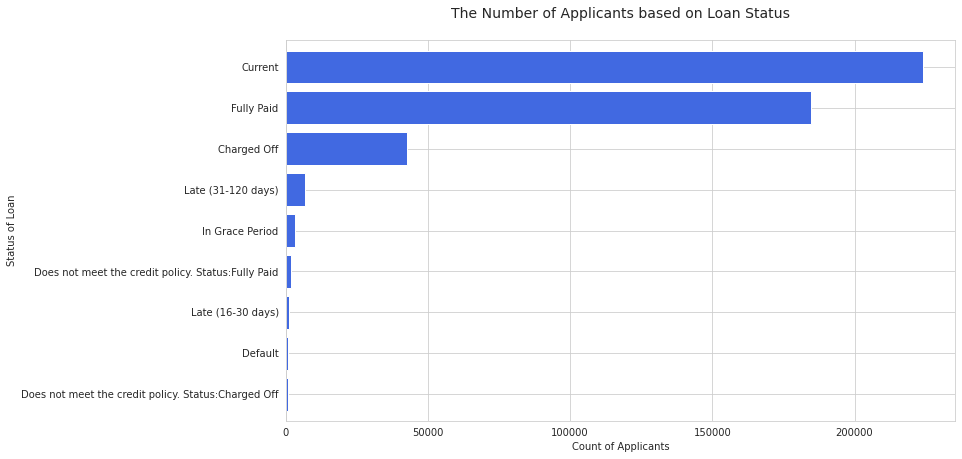

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
loan_group = df['loan_status'].value_counts().sort_values(ascending=True)
loan_group.plot(kind='barh', color='royalblue', width=0.8)
plt.title('The Number of Applicants based on Loan Status\n', fontsize=14)
plt.ylabel('Status of Loan')
plt.xlabel('Count of Applicants')
plt.show()

- There are about 48% which is equal to about 224,226 applicants with loan status of Current, followed by loan status of Fully Paid with 39.6% or equal to 184,739 applicants.

#### Univariate: Target Class Balance

In [ ]:
risk_group = df.groupby('risk').size().reset_index()
risk_group.columns = ['target','total']
risk_group['%'] = round(risk_group['total']*100/sum(risk_group['total']),2)
risk_group.sort_values(by='total', ascending=False)

,target,total,%
1,Good Risk,414099,88.81
0,Bad Risk,52186,11.19


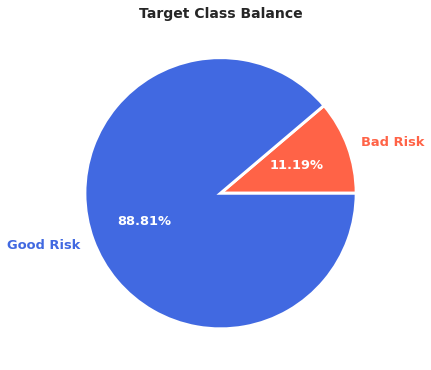

In [ ]:
# visualization
sns.set_style('whitegrid')
labels = ['Bad Risk', 'Good Risk']
colors = ['tomato', 'royalblue']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = plt.pie(risk_group['total'], labels=labels, autopct='%.2f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 13})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('Target Class Balance', fontsize=14, fontweight='bold')
plt.tight_layout()

- It is observed that this dataset is highly imbalanced with the 11% minority class, i.e Bad Risk and 88% majority class, i.e Good Risk.

#### Bivariate Analysis: Categorical Features

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

##### Bivariate: Risk Status by Term

In [ ]:
# in general
df['term'].value_counts(normalize=True)

 36 months    0.724778
 60 months    0.275222
Name: term, dtype: float64

In [ ]:
# good risk by term
term_group = good.groupby('term').size().reset_index()
term_group.columns = ['term', 'total']
term_group['%'] = round(term_group['total']*100/sum(term_group['total']),2)
print('Good Risk Status by Term')
term_group.sort_values(by='total', ascending=False)

Good Risk Status by Term


,term,total,%
0,36 months,304374,73.5
1,60 months,109725,26.5


In [ ]:
# bad risk by term
term_group = bad.groupby('term').size().reset_index()
term_group.columns = ['term', 'total']
term_group['%'] = round(term_group['total']*100/sum(term_group['total']),2)
print('Bad Risk Status by Term')
term_group.sort_values(by='total', ascending=False)

Bad Risk Status by Term


,term,total,%
0,36 months,33579,64.34
1,60 months,18607,35.66


Text(0.5, 0, '\nTerm')

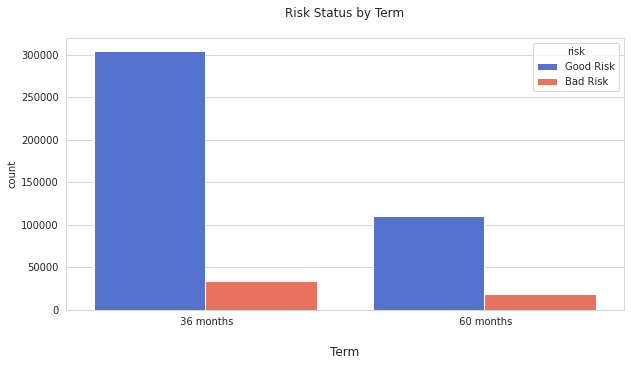

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue', 'tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='term', hue = 'risk')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)

- Loan term tell us about the number of payments on the loan.
- There are only two types of loan terms, either 36 months or 60 months. Most of the loans (73%) are shorter, with a term of 36 months.
- Loans with 36 months period are almost twice as likely to bad risk as loans with 60 months period.

##### Bivariate: Risk Status by Verification Status

In [ ]:
# in general
df['verification_status'].value_counts(normalize=True)

Verified           0.360413
Source Verified    0.321677
Not Verified       0.317911
Name: verification_status, dtype: float64

In [ ]:
# good risk by verification status
verify_group = good.groupby(['verification_status']).size().reset_index()
verify_group.columns = ['verification_status', 'total']
verify_group['%'] = round(verify_group['total']*100/sum(verify_group['total']),2)
print('Good Risk Status by Verification Status')
verify_group.sort_values(by='total', ascending=False)

Good Risk Status by Verification Status


,verification_status,total,%
2,Verified,146164,35.30
0,Not Verified,134032,32.37
1,Source Verified,133903,32.34


In [ ]:
# bad risk by verification status
verify_group = bad.groupby(['verification_status']).size().reset_index()
verify_group.columns = ['verification_status', 'total']
verify_group['%'] = round(verify_group['total']*100/sum(verify_group['total']),2)
print('Bad Risk Status by Verification Status')
verify_group.sort_values(by='total', ascending=False)

Bad Risk Status by Verification Status


,verification_status,total,%
2,Verified,21891,41.95
1,Source Verified,16090,30.83
0,Not Verified,14205,27.22


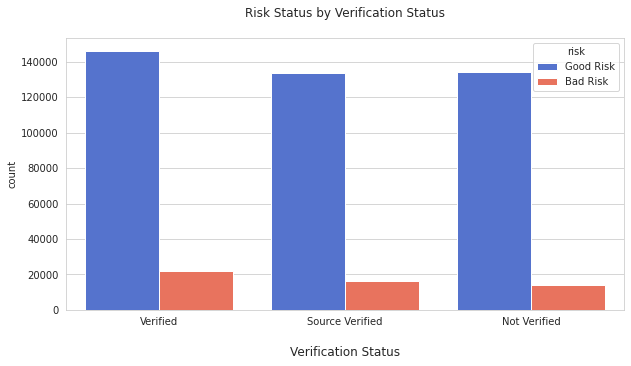

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue', 'tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='verification_status', hue = 'risk')
plt.title('Risk Status by Verification Status\n', fontsize=12)
plt.xlabel('\nVerification Status', fontsize=12);

- Verification status tell us whether the income was verified by the company, not verified, or if the income source was verified.
- Most of the income has had its verified by the company (36%) although 31% were not verified.

##### Bivariate: Risk Status by Payment Plan

In [ ]:
# replace
df['pymnt_plan'] = df['pymnt_plan'].replace(['n','y'],['No','Yes'])

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [ ]:
# in general
df['pymnt_plan'].value_counts(normalize=True)

No     0.999981
Yes    0.000019
Name: pymnt_plan, dtype: float64

In [ ]:
# good risk by payment plan
pp_group = good.groupby(['pymnt_plan']).size().reset_index()
pp_group.columns = ['pymnt_plan', 'total']
pp_group['%'] = round(pp_group['total']*100/sum(pp_group['total']),2)
print('Good Risk Status by Payment Plan')
pp_group.sort_values(by='total')

Good Risk Status by Payment Plan


,pymnt_plan,total,%
1,Yes,4,0.0
0,No,414095,100.0


In [ ]:
# bad risk by payment plan
pp_group = bad.groupby(['pymnt_plan']).size().reset_index()
pp_group.columns = ['pymnt_plan', 'total']
pp_group['%'] = round(pp_group['total']*100/sum(pp_group['total']),2)
print('Bad Risk Status by Payment Plan')
pp_group.sort_values(by='total')

Bad Risk Status by Payment Plan


,pymnt_plan,total,%
1,Yes,5,0.01
0,No,52181,99.99


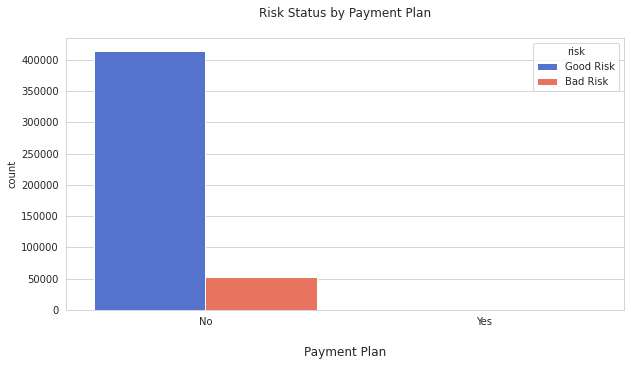

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue', 'tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='pymnt_plan', hue = 'risk')
plt.title('Risk Status by Payment Plan\n', fontsize=12)
plt.xlabel('\nPayment Plan', fontsize=12);

- Payment plan indicates if a payment plan has been put in place for the loan.
- Most all of the applicants does not prepare a payment plan for the loan (99%), which means they do not have a clear repayment plan. It's interesting that only 9 applicants prepare a payment plan.

##### Bivariate: Risk Status by Initial List Status

In [ ]:
# replace
df['initial_list_status'] = df['initial_list_status'].replace(['w','f'],['Whole Loan','Fractional Loan'])

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [ ]:
# in general
df['initial_list_status'].value_counts(normalize=True)

Fractional Loan    0.649828
Whole Loan         0.350172
Name: initial_list_status, dtype: float64

In [ ]:
# good risk by initial list status
ils_group = good.groupby(['initial_list_status']).size().reset_index()
ils_group.columns = ['initial_list_status', 'total']
ils_group['%'] = round(ils_group['total']*100/sum(ils_group['total']),2)
print('Good Risk Status by Initial List Status')
ils_group.sort_values(by='total', ascending=False)

Good Risk Status by Initial List Status


,initial_list_status,total,%
0,Fractional Loan,265883,64.21
1,Whole Loan,148216,35.79


In [ ]:
# bad risk by initial list status
ils_group = bad.groupby(['initial_list_status']).size().reset_index()
ils_group.columns = ['initial_list_status', 'total']
ils_group['%'] = round(ils_group['total']*100/sum(ils_group['total']),2)
print('Bad Risk Status by Initial List Status')
ils_group.sort_values(by='total', ascending=False)

Bad Risk Status by Initial List Status


,initial_list_status,total,%
0,Fractional Loan,37122,71.13
1,Whole Loan,15064,28.87


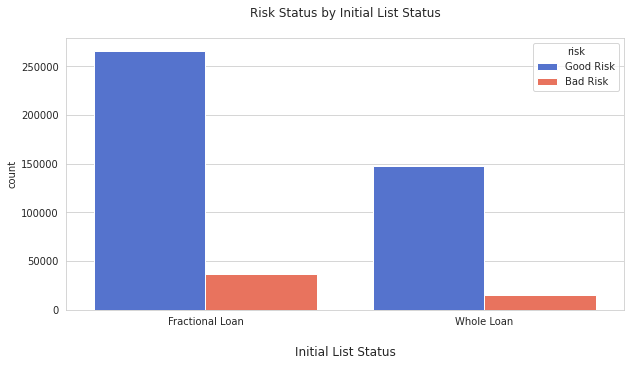

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue', 'tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='initial_list_status', hue = 'risk')
plt.title('Risk Status by Initial List Status\n', fontsize=12)
plt.xlabel('\nInitial List Status', fontsize=12);

- Initial list status tell us about the initial listing status of the loan. 
- There are only two types of initial list status, either W (Whole loan) or F (Fractional loan). This has to do with whether the creditor provided the entire loan or if the loan is across multiple creditor.
- Most of the loan is fractional loans (64%).

##### Bivariate: Risk Status by Purpose

In [ ]:
# in general
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.588042
credit_card           0.223376
home_improvement      0.056912
other                 0.050806
major_purchase        0.021077
small_business        0.015040
car                   0.011574
medical               0.009870
moving                0.006421
vacation              0.005334
wedding               0.005025
house                 0.004866
educational           0.000905
renewable_energy      0.000753
Name: purpose, dtype: float64

In [ ]:
# good risk by purpose
purpose_group = good.groupby(['purpose']).size().reset_index()
purpose_group.columns = ['purpose', 'total']
purpose_group['%'] = round(purpose_group['total']*100/sum(purpose_group['total']),2)
print('Good Risk by Purpose')
purpose_group.sort_values(by='total', ascending=False)

Good Risk by Purpose


,purpose,total,%
2,debt_consolidation,242359,58.53
1,credit_card,94957,22.93
4,home_improvement,23865,5.76
9,other,20351,4.91
6,major_purchase,8866,2.14
11,small_business,5467,1.32
0,car,4909,1.19
7,medical,3978,0.96
8,moving,2529,0.61
12,vacation,2182,0.53


In [ ]:
# bad risk by purpose
purpose_group = bad.groupby(['purpose']).size().reset_index()
purpose_group.columns = ['purpose', 'total']
purpose_group['%'] = round(purpose_group['total']*100/sum(purpose_group['total']),2)
print('Bad Risk by Purpose')
purpose_group.sort_values(by='total', ascending=False)

Bad Risk by Purpose


,purpose,total,%
2,debt_consolidation,31836,61.00
1,credit_card,9200,17.63
9,other,3339,6.40
4,home_improvement,2672,5.12
11,small_business,1546,2.96
6,major_purchase,962,1.84
7,medical,624,1.20
0,car,488,0.94
8,moving,465,0.89
5,house,322,0.62


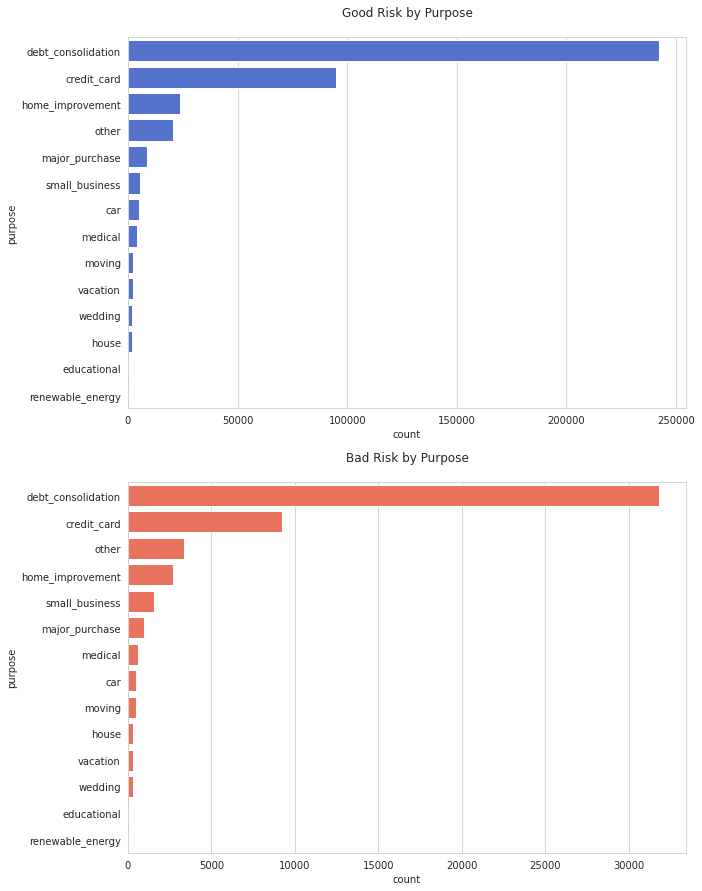

In [ ]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, y='purpose', 
              color = 'royalblue', 
              order = good['purpose'].value_counts().index, 
              ax=ax[0])
ax[0].set_title('Good Risk by Purpose\n', fontsize=12)

sns.countplot(data = bad, y='purpose',
              color = 'tomato', 
              order = bad['purpose'].value_counts().index, 
              ax=ax[1])
ax[1].set_title('Bad Risk by Purpose\n', fontsize=12)

plt.show()

- The purpose feature is a category provided by the applicant's for the loan request. There are 13 categories. 
- There are over half of the loans (58%) were for debt consolidation. Other significant categories were credit card and home improvement.
- Only 0.1% of loans for renewable energy have bad risk status, but 61% of debt consolidation loans have bad risk status.

##### Bivariate: Risk Status by Home Ownership

In [ ]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
# reduce the number of categories of home ownership
def func(row):
    if row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif (row['home_ownership'] == 'RENT'):
        val ='RENT'
    elif (row['home_ownership'] == 'OWN'):
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df['home_ownership'] = df.apply(func, axis=1)

The **ANY** and **NONE** labels on the `home_ownership` feature can be combined with the **OTHER** label.

In [ ]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [ ]:
# in general
df['home_ownership'].value_counts(normalize=True)

MORTGAGE    0.505860
RENT        0.404201
OWN         0.089439
OTHERS      0.000500
Name: home_ownership, dtype: float64

In [ ]:
# good risk by home ownership
ho_group = good.groupby(['home_ownership']).size().reset_index()
ho_group.columns = ['home_ownership', 'total']
ho_group['%'] = round(ho_group['total']*100/sum(ho_group['total']),2)
print('Good Risk Status by Home Ownership')
ho_group.sort_values(by='total', ascending=False)

Good Risk Status by Home Ownership


,home_ownership,total,%
0,MORTGAGE,212628,51.35
3,RENT,164223,39.66
2,OWN,37061,8.95
1,OTHERS,187,0.05


In [ ]:
# bad risk by home ownership
ho_group = bad.groupby(['home_ownership']).size().reset_index()
ho_group.columns = ['home_ownership', 'total']
ho_group['%'] = round(ho_group['total']*100/sum(ho_group['total']),2)
print('Bad Risk Status by Home Ownership')
ho_group.sort_values(by='total', ascending=False)

Bad Risk Status by Home Ownership


,home_ownership,total,%
3,RENT,24250,46.47
0,MORTGAGE,23247,44.55
2,OWN,4643,8.90
1,OTHERS,46,0.09


Text(0.5, 0, '\nHome Ownership')

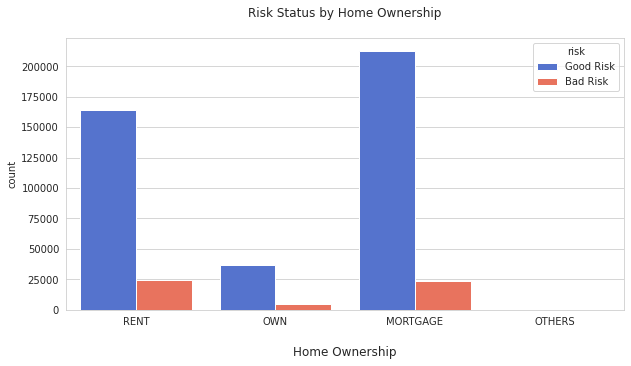

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue', 'tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='home_ownership', hue = 'risk')
plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)

- The home ownership feature is category provided by the applicant's during registration.
- Most applicants have an existing mortgage (50%) or are currently renting a home (40%).
- Applicants who have an existing mortgage or are currently renting a home have a higher probability of bad risk.

##### Bivariate: Risk Status by Grade

In [ ]:
# in general
df['grade'].value_counts(normalize=True)

B    0.293659
C    0.268705
D    0.164895
A    0.160561
E    0.076685
F    0.028371
G    0.007124
Name: grade, dtype: float64

In [ ]:
# good risk by grade
grade_group = good.groupby(['grade']).size().reset_index()
grade_group.columns = ['grade', 'total']
grade_group['%'] = round(grade_group['total']*100/sum(grade_group['total']),2)
print('Good Risk by Grade')
grade_group.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
1,B,125921,30.41
2,C,110550,26.70
0,A,71912,17.37
3,D,64756,15.64
4,E,28618,6.91
5,F,9962,2.41
6,G,2380,0.57


In [ ]:
# bad risk by grade
grade_group = bad.groupby(['grade']).size().reset_index()
grade_group.columns = ['grade', 'total']
grade_group['%'] = round(grade_group['total']*100/sum(grade_group['total']),2)
print('Good Risk by Grade')
grade_group.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
2,C,14743,28.25
3,D,12132,23.25
1,B,11008,21.09
4,E,7139,13.68
5,F,3267,6.26
0,A,2955,5.66
6,G,942,1.81


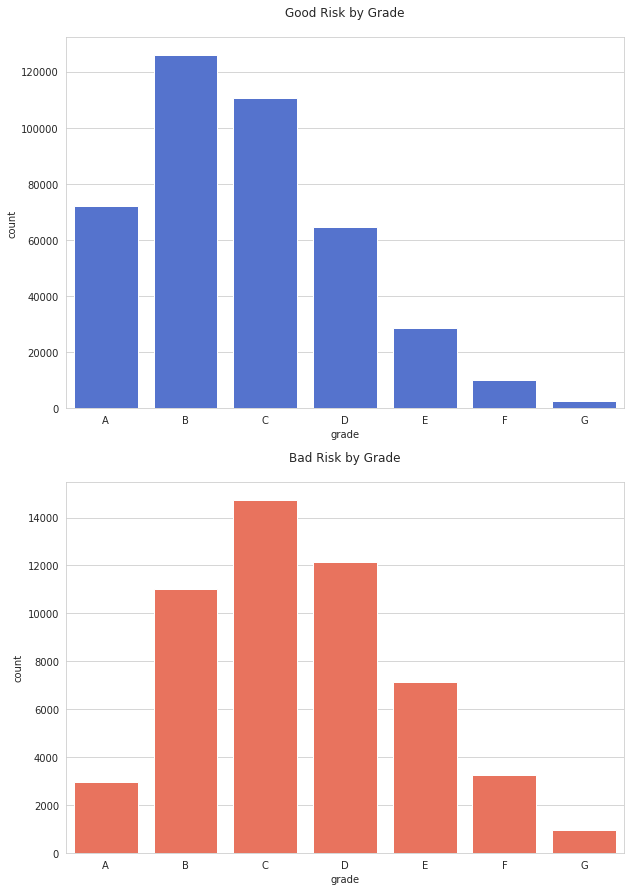

In [ ]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, x='grade', 
              color = 'royalblue', 
              order=sorted(good['grade'].unique()), 
              ax=ax[0])
ax[0].set_title('Good Risk by Grade\n', fontsize=12)

sns.countplot(data = bad, x='grade',
              color = 'tomato', 
              order=sorted(bad['grade'].unique()), 
              ax=ax[1])
ax[1].set_title('Bad Risk by Grade\n', fontsize=12)

plt.show()

- Grade feature tell us about assigned loan grade by lending company. There are 7 different grades from A to G. 
- Most of the loans are graded B (29.3%). There are about 72%  loan are graded C and above, and less than 1% of the loans are graded G.

##### Bivariate: Risk Status by Sub-Grade

In [ ]:
# in general
df['sub_grade'].value_counts(normalize=True).head()

B3    0.067954
B4    0.065421
C1    0.057804
C2    0.057347
B2    0.057068
Name: sub_grade, dtype: float64

In [ ]:
# good risk by sub-grade
sg_group = good.groupby(['sub_grade']).size().reset_index()
sg_group.columns = ['sub_grade', 'total']
sg_group['%'] = round(sg_group['total']*100/sum(sg_group['total']),2)
print('Good Risk by Sub-Grade')
sg_group.sort_values(by='total', ascending=False)
sg_group.head()

Good Risk by Sub-Grade


,sub_grade,total,%
0,A1,10332,2.50
1,A2,10636,2.57
2,A3,12121,2.93
3,A4,18191,4.39
4,A5,20632,4.98


In [ ]:
# bad risk by sub-grade
sg_group = bad.groupby(['sub_grade']).size().reset_index()
sg_group.columns = ['sub_grade', 'total']
sg_group['%'] = round(sg_group['total']*100/sum(sg_group['total']),2)
print('Bad Risk by Sub-Grade')
sg_group.sort_values(by='total', ascending=True)
sg_group.head()

Bad Risk by Sub-Grade


,sub_grade,total,%
0,A1,209,0.40
1,A2,320,0.61
2,A3,447,0.86
3,A4,854,1.64
4,A5,1125,2.16


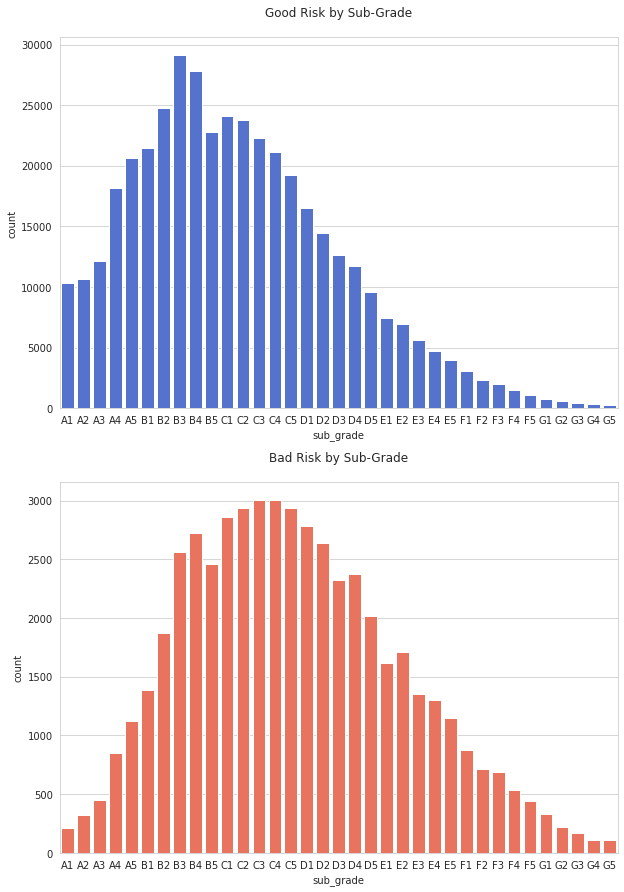

In [ ]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, x='sub_grade', 
              color = 'royalblue', 
              order=sorted(good['sub_grade'].unique()),
              ax=ax[0])
ax[0].set_title('Good Risk by Sub-Grade\n', fontsize=12)

sns.countplot(data = bad, x='sub_grade',
              color = 'tomato', 
              order=sorted(bad['sub_grade'].unique()),
              ax=ax[1])
ax[1].set_title('Bad Risk by Sub-Grade\n', fontsize=12)

plt.show()

##### Bivariate: Risk Status by Employment Length

In [ ]:
# in general
df['emp_length'].value_counts(normalize=True)

10+ years    0.336979
2 years      0.092915
3 years      0.082187
< 1 year     0.081444
5 years      0.069112
1 year       0.066525
4 years      0.062934
7 years      0.058795
6 years      0.058642
8 years      0.050295
9 years      0.040173
Name: emp_length, dtype: float64

In [ ]:
# good risk by employment length
el_group = good.groupby(['emp_length']).size().reset_index()
el_group.columns = ['emp_length', 'total']
el_group['%'] = round(el_group['total']*100/sum(el_group['total']),2)
print('Good Risk by Employment Length')
el_group.sort_values(by='total', ascending=False).head()

Good Risk by Employment Length


,emp_length,total,%
1,10+ years,134724,34.03
2,2 years,36726,9.28
3,3 years,32488,8.21
10,< 1 year,31838,8.04
5,5 years,27163,6.86


In [ ]:
# bad risk by employment length
el_group = bad.groupby(['emp_length']).size().reset_index()
el_group.columns = ['emp_length', 'total']
el_group['%'] = round(el_group['total']*100/sum(el_group['total']),2)
print('Bad Risk by Employment Length')
el_group.sort_values(by='total', ascending=False).head()

Bad Risk by Employment Length


,emp_length,total,%
1,10+ years,15325,31.07
2,2 years,4647,9.42
10,< 1 year,4427,8.97
3,3 years,4108,8.33
5,5 years,3611,7.32


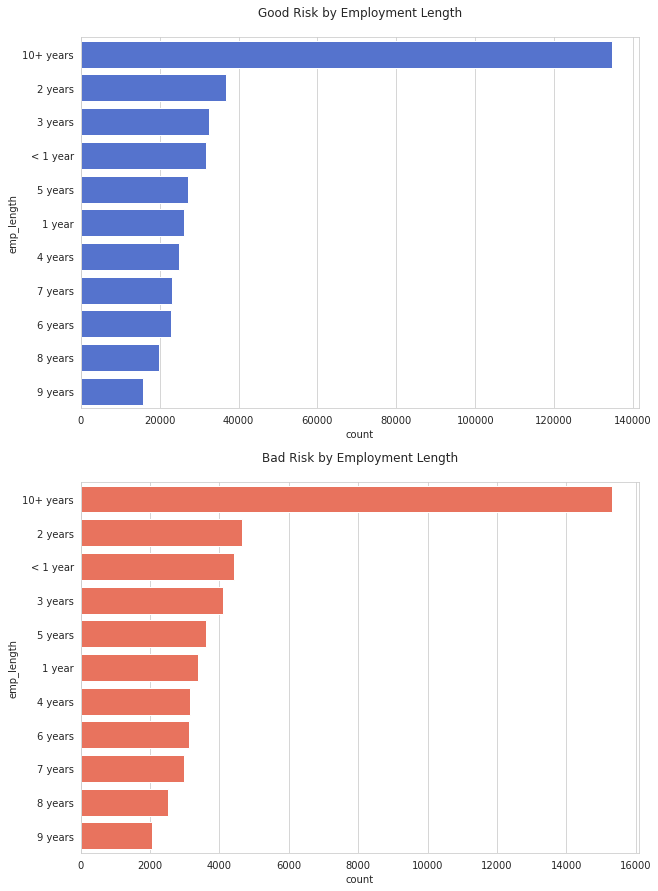

In [ ]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, y='emp_length', 
              color = 'royalblue', 
              order = good['emp_length'].value_counts().index, 
              ax=ax[0])
ax[0].set_title('Good Risk by Employment Length\n', fontsize=12)

sns.countplot(data = bad, y='emp_length',
              color = 'tomato', 
              order = bad['emp_length'].value_counts().index, 
              ax=ax[1])
ax[1].set_title('Bad Risk by Employment Length\n', fontsize=12)

plt.show()

- There are 11 levels, from < 1 year, 1 year, through to 10+ years.
- Applicant's employment length falls into 2 big class: the most frequent is applicants with 10+ years of experience (33.7%), the other is applicants with < 3 years of working experience (32.3%).

#### Bivariate Analysis: Numerical Features

In [ ]:
def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # plot without risk status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='royalblue', ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='tomato', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # plot with risk status
    if continuous:
        sns.boxplot(x=col_name, y='risk', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Risk Status')
    else:
        bad_rates = df.groupby(col_name)['risk'].value_counts(normalize=True).loc[:,'Bad Risk']
        sns.barplot(x=bad_rates.index, y=bad_rates.values, saturation=1, ax=ax2)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

##### Bivariate: Risk Status by Loan Amount

In [ ]:
# in general
df['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,14624.953053,8390.633508,500.0,8000.0,12800.0,20000.0,35000.0
Good Risk,414099.0,14278.503389,8272.492476,500.0,8000.0,12000.0,20000.0,35000.0


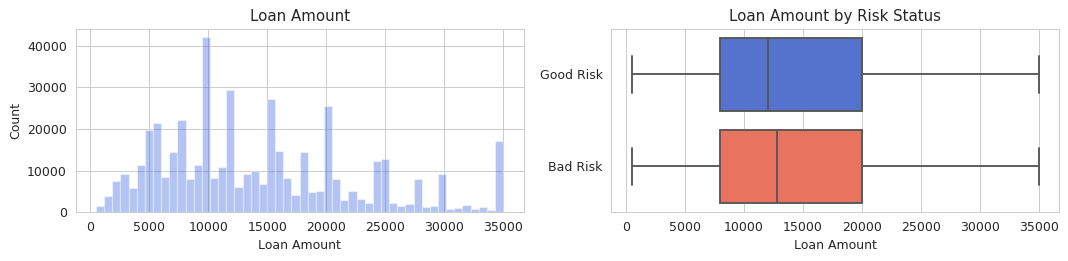

In [ ]:
# visualization
plot_var('loan_amnt', 'Loan Amount', continuous=True)

- The range of loan amount is from \$500 to \$35,000 with a median of \$12,000.
- The median of the applicants with bad risk is slightly higher than the applicants with good risk. It means bad risk loans tend to have higher loan amounts.

##### Bivariate: Risk Status by Interest Rate

In [ ]:
# in general
df['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,15.973031,4.256379,5.42,13.05,15.61,18.85,26.06
Good Risk,414099.0,13.559068,4.294915,5.42,10.49,13.35,16.29,26.06


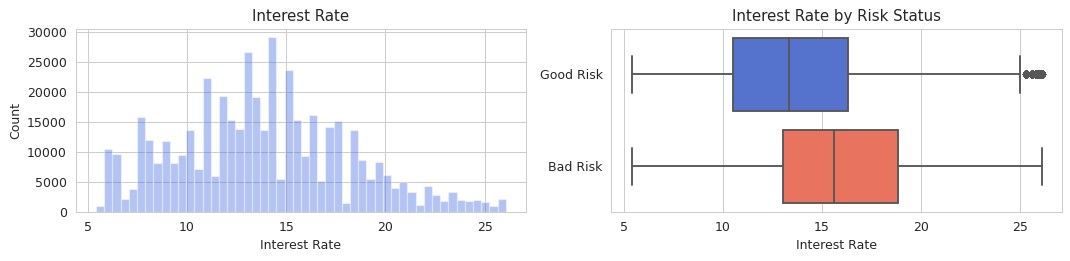

In [ ]:
# visualization
plot_var('int_rate', 'Interest Rate', continuous=True)

- The range of interest rates on the loans is from 5.42% to 26.06% with a median of 13.6%
- Bad risk loans tend to have higher interest rates. It means applicants with the high interest rate have a high chance of not being able to repay the loan.

##### Bivariate: Risk Status by Installment

In [ ]:
# in general
df['installment'].describe()

count    466285.000000
mean        432.061201
std         243.485550
min          15.670000
25%         256.690000
50%         379.890000
75%         566.580000
max        1409.990000
Name: installment, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,442.587052,246.432087,15.91,266.995,392.50,574.40,1408.13
Good Risk,414099.0,430.734701,243.079648,15.67,255.040,377.88,565.18,1409.99


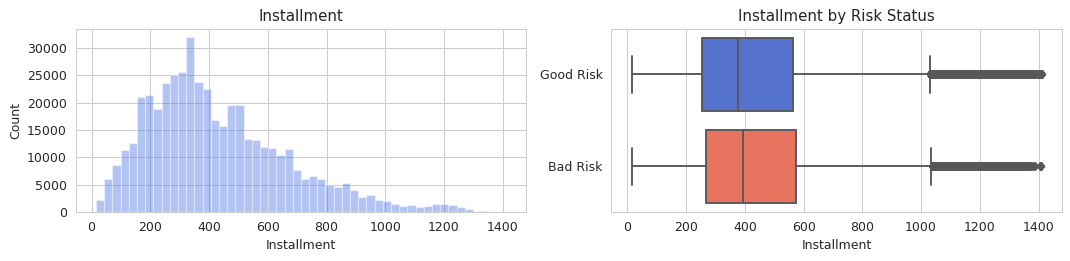

In [ ]:
# visualization
plot_var('installment', 'Installment', continuous=True)

- The range of installments is from \$15.67 to \$1,409.99 per month with a median of \$379.89 per month.
- The median of the applicants with bad risk is slightly higher than the applicants with good risk. It means bad risk loans tend to have higher installments.

##### Bivariate: Risk Status by Annual Income

In [ ]:
# in general
df['annual_inc'].describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,65615.836951,41219.446894,2000.0,41000.0,57000.0,80000.0,1250000.0
Good Risk,414095.0,74242.921654,56384.984019,1896.0,45000.0,64000.0,90000.0,7500000.0


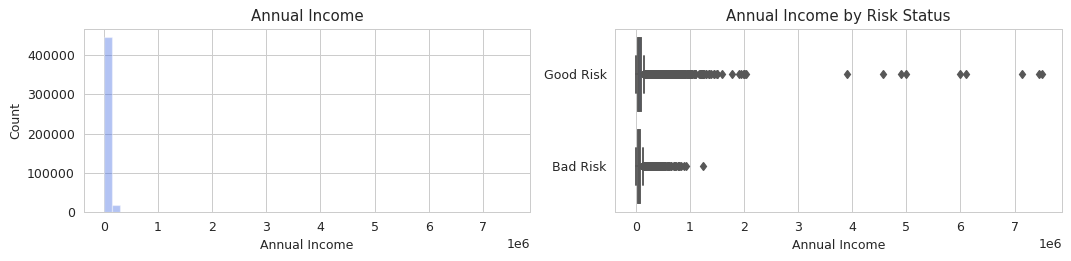

In [ ]:
# visualization
plot_var('annual_inc', 'Annual Income', continuous=True)

- The range of annual income of applicants is from \$1,896 to \$7,500,000 with a median of \$63,000
- It appears that applicants with higher income are more likely to repay their loans.

##### Bivariate: Risk Status by Recoveries

In [ ]:
# in general
df['recoveries'].describe()

count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,762.555581,1486.036802,0.0,0.0,0.0,999.7625,33520.27
Good Risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.00


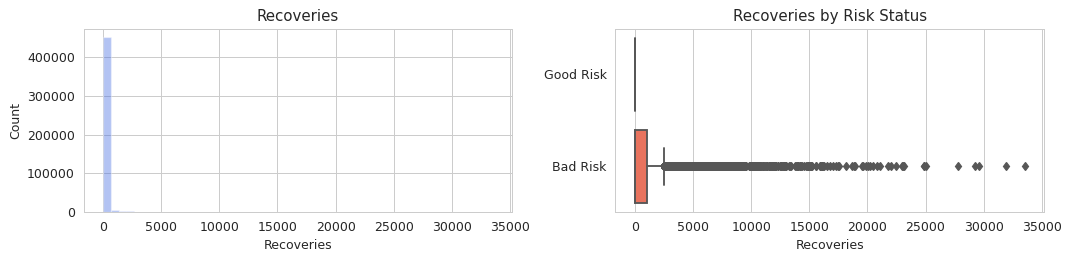

In [ ]:
# visualization
plot_var('recoveries', 'Recoveries', continuous=True)

- The range of recoveries is from $0 to \$33,520 with a median of \$0
- The bad risk loans tend to have recoveries value greater than 0. It means applicants with a recoveries value greater than 0 have a high chance of not being able to repay the loans. While applicants who are likely to repay the loan have a recoveries value of 0. 

##### Bivariate: Risk Status by Collection Recovery Fee

In [ ]:
# in general
df['collection_recovery_fee'].describe()

count    466285.000000
mean          8.961534
std          85.491437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['collection_recovery_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,80.071836,244.154672,0.0,0.0,0.0,18.0,7002.19
Good Risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


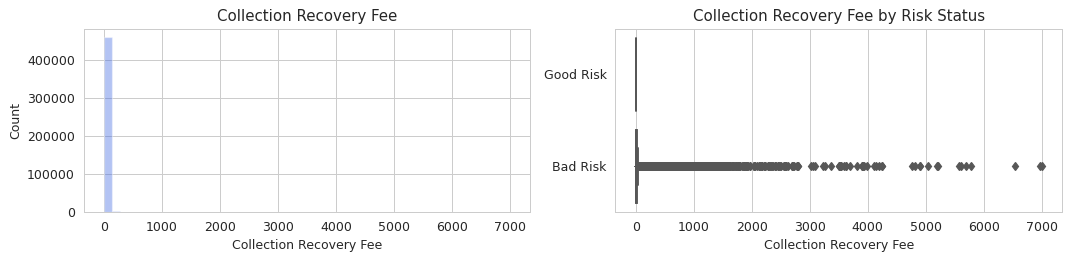

In [ ]:
# visualization
plot_var('collection_recovery_fee', 'Collection Recovery Fee', continuous=True)

- The range of collection recovery fee is from \$0 to \$7,002 with a median of \$0
- The bad risk loans tend to have collection recovery fee greater than 0. It means applicants with a collection recovery fee greater than 0 have a high chance of not being able to repay the loans. While applicants who are likely to repay the loan have a collection recovery fee of 0. 

##### Bivariate: Risk Status by Total Principal Received

In [ ]:
# in general
df['total_rec_prncp'].describe()

count    466285.000000
mean       8866.014657
std        7031.687997
min           0.000000
25%        3708.560000
50%        6817.760000
75%       12000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,3829.815241,3581.790642,0.00,1411.555,2790.015,5078.055,34483.27
Good Risk,414099.0,9500.691637,7103.511739,273.66,4214.910,7500.000,12481.370,35000.03


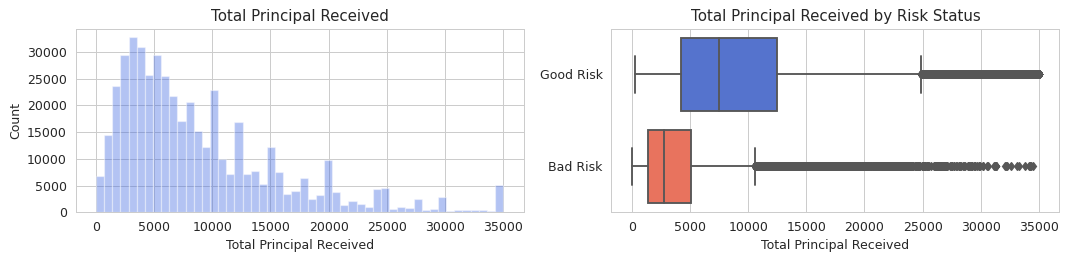

In [ ]:
# visualization
plot_var('total_rec_prncp', 'Total Principal Received', continuous=True)

- The range of total principal received is from \$0 to \$35,000 with a median of \$6,817
- Bad risk loans tend to have lower principal received. It means applicants with low principal received are unlikely to repay the loan.

##### Bivariate: Risk Status by Last Payment Amount

In [ ]:
# in general
df['last_pymnt_amnt'].describe()

count    466285.000000
mean       3123.913796
std        5554.737393
min           0.000000
25%         312.620000
50%         545.960000
75%        3187.510000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64

In [ ]:
# breakdown per risk status
df.groupby('risk')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,461.319145,617.624970,0.0,245.7925,381.50,575.120,34833.35
Good Risk,414099.0,3459.461973,5804.263471,0.0,323.3800,588.08,4272.305,36234.44


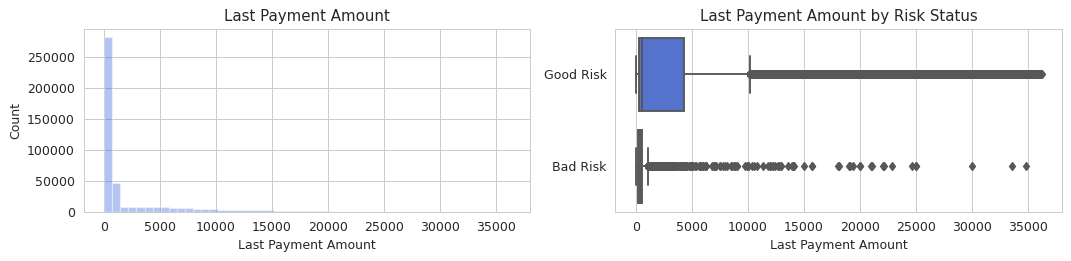

In [ ]:
# visualization
plot_var('last_pymnt_amnt', 'Last Payment Amount', continuous=True)

- The range of the last payment amount is from \$0 to \$36,234 with a median of \$545.96
- Bad risk loans tend to have a lower amount of last payment. It means applicants with a low last payment amount are unlikely to repay the loan.

##### The Remaining Numerical Features

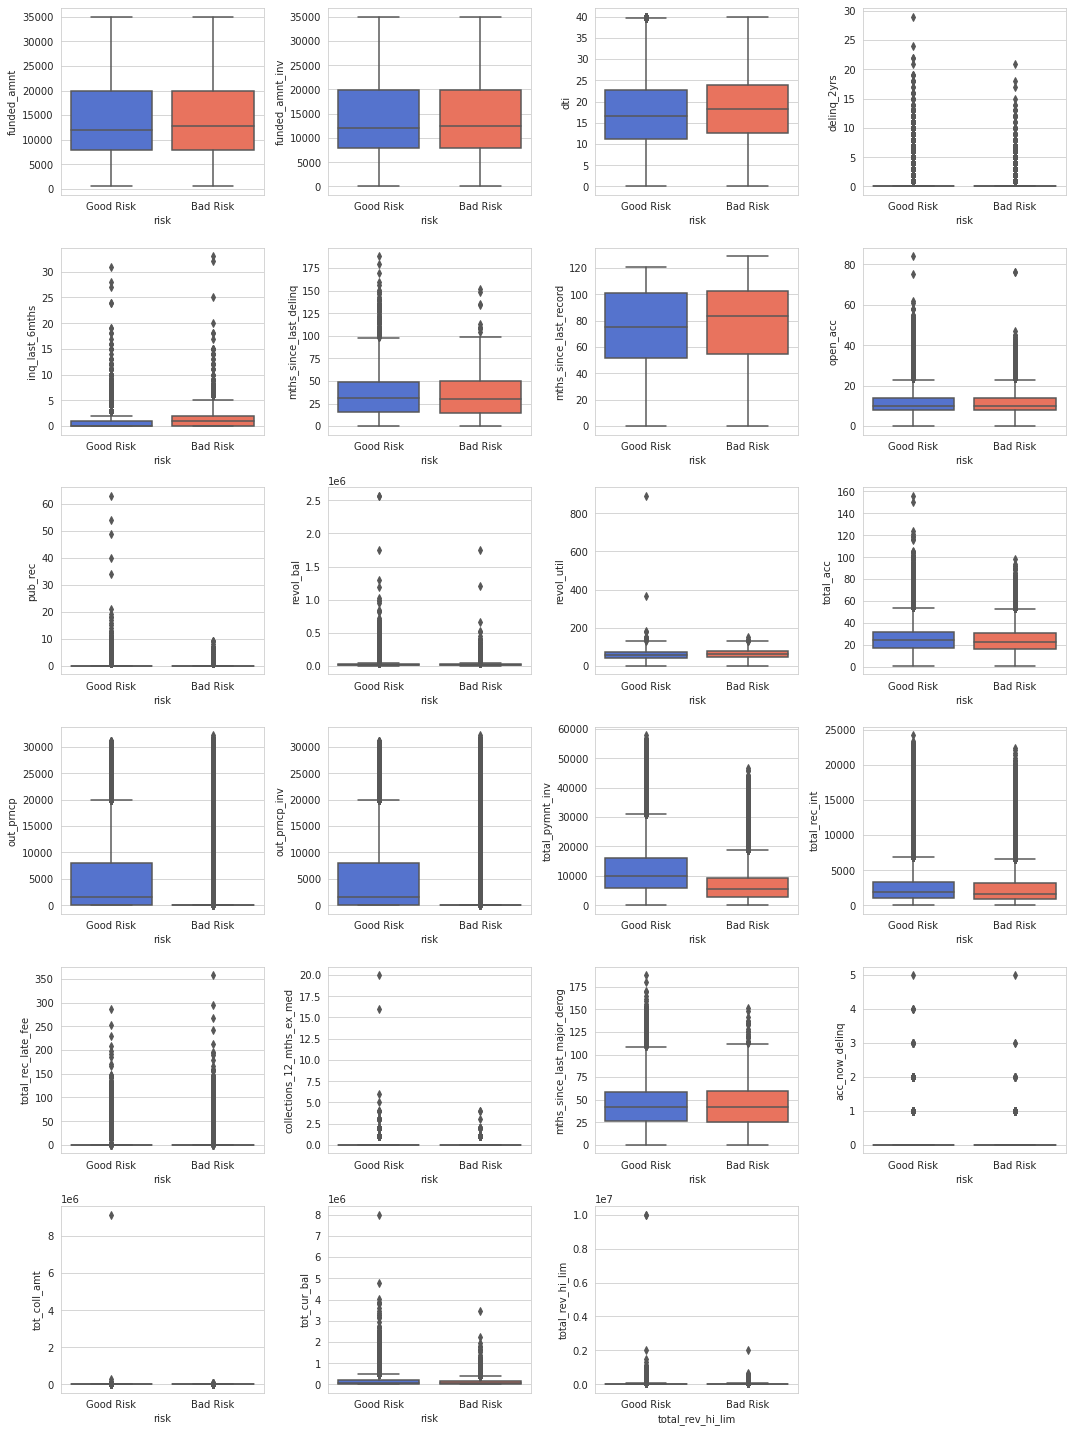

In [ ]:
num = ['funded_amnt', 'funded_amnt_inv','dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee','collections_12_mths_ex_med', 
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# visualization
fig = plt.figure(figsize=(15,20))

for i in range(0, len(num)):
    plt.subplot(6,4,i+1)
    sns.boxplot(y=df[num[i]], x=df['risk'])
plt.xlabel(num[i])
plt.tight_layout()
plt.show()

##### Bivariate: Total Loan Issued Over Time

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy["issue_d_year"] = df_copy["issue_d"].dt.strftime('%Y')
issue_agg = df_copy.groupby(["issue_d_year"])[["id"]].nunique()
issue_agg.rename(columns={"id": "count"}, inplace=True)
issue_agg.reset_index(inplace=True)
issue_agg

,issue_d_year,count
0,2007,603
1,2008,2393
2,2009,5281
3,2010,12537
4,2011,21721
5,2012,53367
6,2013,134755
7,2014,235628


In [ ]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='royalblue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

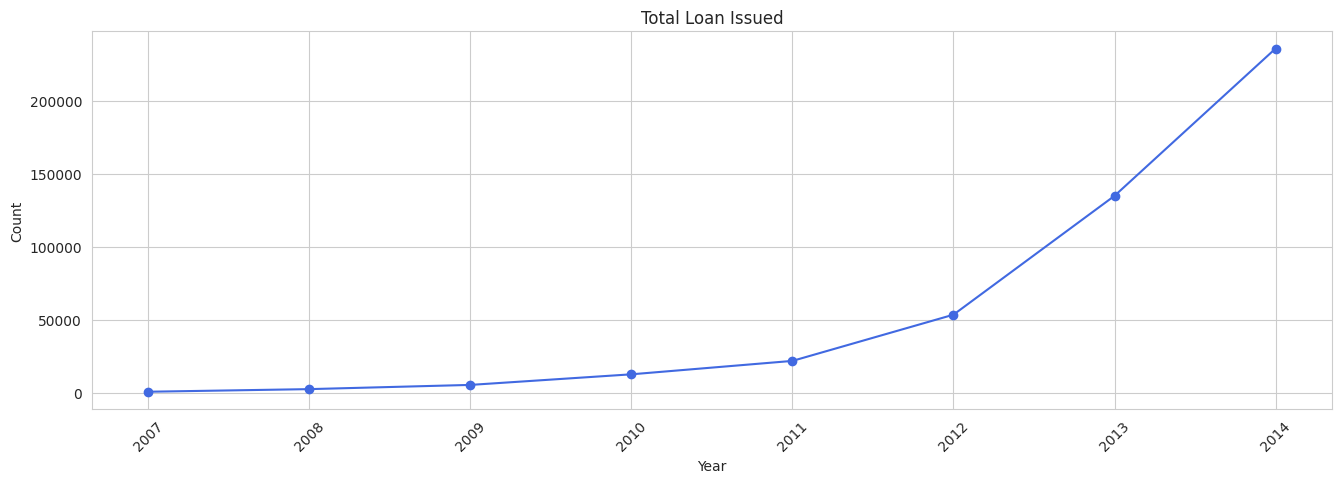

In [ ]:
plot_df(issue_agg, x=issue_agg['issue_d_year'], y=issue_agg["count"], title="Total Loan Issued", xlabel='Year', ylabel = "Count")

- Total loans issued increase from year to year. The highest occurred in 2014, with 235,628 loans issued by the lending company.
- The highest increase also occurred from 2013 to 2014, which is 100,873 loan increases.

###### Per Risk Status

In [ ]:
# issue by rissk status
issue_risk = df_copy.groupby(['issue_d_year', 'risk'])[["id"]].count()
issue_risk.rename(columns={'id': 'count'}, inplace=True)
issue_risk.reset_index(inplace=True)
issue_risk = issue_risk.pivot(index=['issue_d_year'], columns='risk', values='count').reset_index()
issue_risk = issue_risk.reset_index(drop=True).rename_axis(None, axis=1)
issue_risk

,issue_d_year,Bad Risk,Good Risk
0,2007,158,445
1,2008,496,1897
2,2009,723,4558
3,2010,1761,10776
4,2011,3270,18451
5,2012,8361,45006
6,2013,17118,117637
7,2014,20299,215329


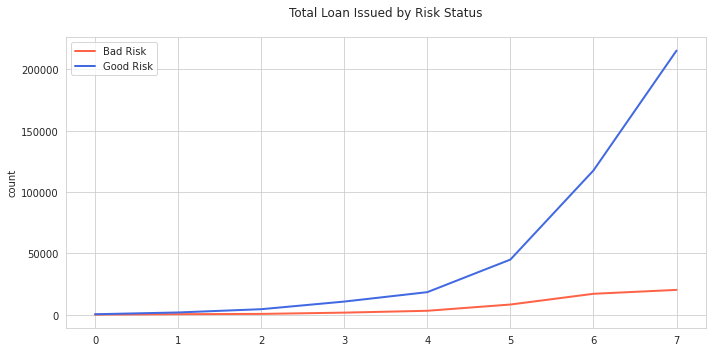

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
issue_risk.plot(kind='line', ax=ax, lw=2,
                color=['tomato', 'royalblue'])

ax.set_title('Total Loan Issued by Risk Status\n',
        fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='royalblue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

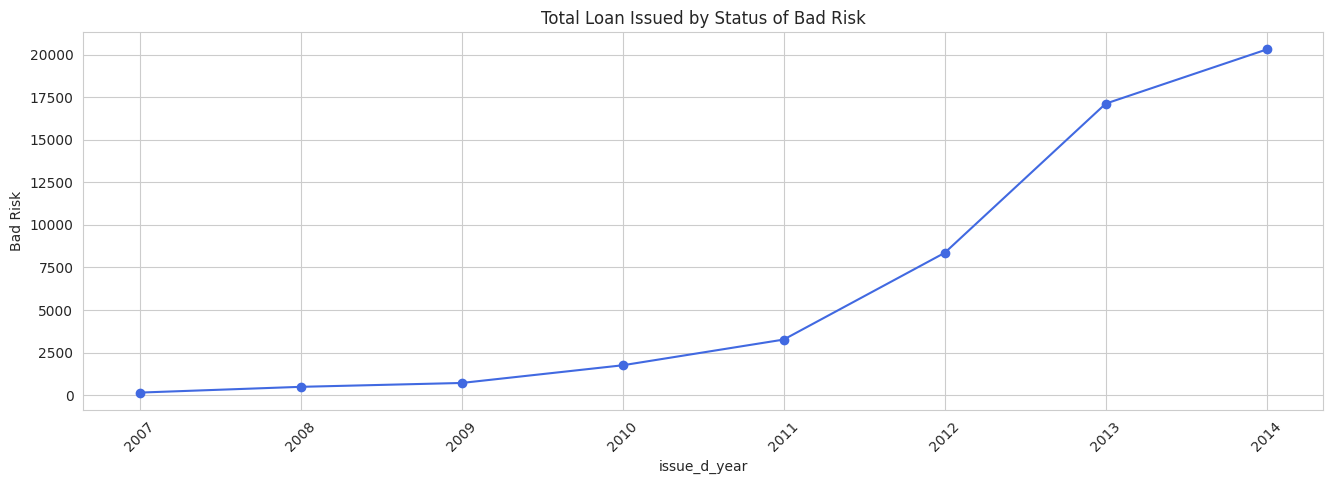

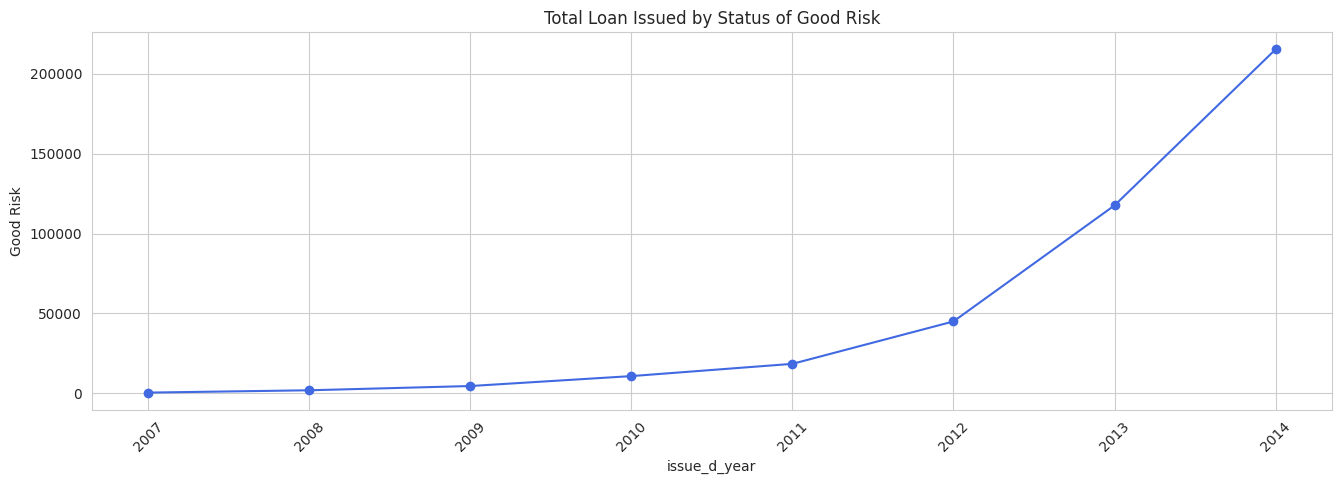

In [ ]:
for i in issue_risk.columns:
  if i != 'issue_d_year':
    plot_df(issue_risk, x=issue_risk['issue_d_year'], y=issue_risk[i], title='Total Loan Issued by Status of ' + i, ylabel = i)

- The number of loans that have bad risks also increases from year to year. The highest increase occurred from 2012 to 2013, which is 8,757 increases.

##### Bivariate: Total Credit Line Opened Over Time

In [ ]:
df_copy["earliest_cr_line_year"] = df_copy["earliest_cr_line"].dt.strftime('%Y')
cline_agg = df_copy.groupby(["earliest_cr_line_year"])[["id"]].nunique()
cline_agg.rename(columns={"id": "count"}, inplace=True)
cline_agg.reset_index(inplace=True)
cline_agg.sort_values(by='count', ascending=False).head(10)

,earliest_cr_line_year,count
53,2000,35539
54,2001,34233
52,1999,32477
55,2002,28999
51,1998,27919
56,2003,24937
50,1997,23418
49,1996,23019
48,1995,21498
57,2004,21114


In [ ]:
def plot_df(df, x, y, title="", xlabel='earliest_cr_line_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='royalblue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

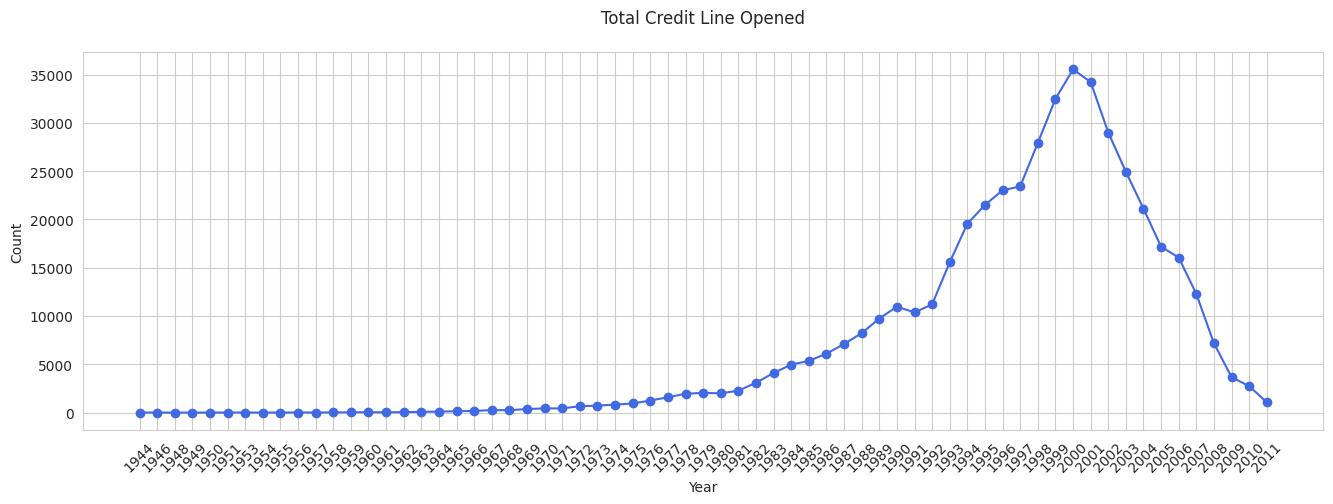

In [ ]:
plot_df(cline_agg, x=cline_agg['earliest_cr_line_year'], y=cline_agg["count"], title="Total Credit Line Opened\n", xlabel='Year', ylabel = "Count")

- Highest number occurred in 2000 with 35,539 lines of credit open. However, after that, the number of credit lines opened continued to decrease.

#### Calculate the Total Loss Suffered by the Company

In [ ]:
# filter only bad risk loans
bad.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk


In [ ]:
# calculate total loan to be paid
def word_strip(x):
  return x.strip()
  
bad['term'] = bad['term'].apply(lambda x: word_strip(x))
bad['term'] = bad['term'].replace(['60 months', '36 months'],[60,36])
bad['must_pay'] = bad['term'] * bad['installment']

- `installment` : The monthly payment owed by the applicants if the loan originates.
- `term` : The number of payments on the loan.

In [ ]:
# calculate the remaining loan to be paid
bad['remain_pay'] = bad['must_pay'] - (bad['total_pymnt'] + bad['total_rec_late_fee'] + bad['collection_recovery_fee'])

- `collection_recovery_fee` : Post charge off collection fee.
- `total_pymnt` : Payments received to date for total amount funded.
- `total_rec_late_fee` : Late fees received to date.

In [ ]:
# total applicants and loss
print('The number of applicants is', bad['id'].count())
print('Total loss suffered by the company is', bad['remain_pay'].sum())

The number of applicants is 52186
Total loss suffered by the company is 687949073.4686067


- In general, the lending company has the possibility to suffer a loss of 687 million from 52,186 applicants.

In [ ]:
bad_copy = bad.copy()

In [ ]:
# reduce the number of categories of home ownership
def func(row):
    if row['loan_status'] == 'Charged Off':
        val = 'Charged Off'
    elif (row['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'):
        val ='Charged Off'
    elif (row['loan_status'] == 'Late (16-30 days)'):
        val ='Late'
    elif (row['loan_status'] == 'Late (31-120 days)'):
        val ='Late'
    else:
        val ='Default'
    return val

bad_copy['loan_status'] = bad.apply(func, axis=1)

In [ ]:
# total loss per loan status
loss_agg= bad_copy.groupby(['loan_status']).agg({"remain_pay" : 'sum', 'id' : 'count'}).reset_index()
loss_agg.columns = ['loan status','total loss', 'total applicant']
loss_agg['% total loss'] = round(loss_agg['total loss']*100/sum(loss_agg['total loss']),2)
loss_agg['avg loss'] = (loss_agg['total loss'])/(loss_agg['total applicant'])
loss_agg.sort_values(by='total loss', ascending=False)

,loan status,total loss,total applicant,% total loss,avg loss
0,Charged Off,5.743563e+08,43236,83.49,13284.215244
2,Late,1.022933e+08,8118,14.87,12600.800273
1,Default,1.129945e+07,832,1.64,13581.065603


- It is observed that the loan status of charged off is the biggest source of loss (83%) for the lending company.

##### Breakdown: Loan Status of Charged Off

In this period, the applicants have been delinquent on their credit card or loan payments for several months, and the creditor has given up on collecting the money owed by the applicants, which means it is a loss for the lending company. There is no longer a reasonable expectation of further payments on this loan.

In [ ]:
bad_co = bad.loc[bad['loan_status'].isin(['Does not meet the credit policy. Status:Charged Off', 'Charged Off'])]
bad_co.sample(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
300914,28562737,35000,35000,35000.0,60,19.52,917.97,E,E2,1 year,...,NaN,NaN,NaN,15200.0,NaN,NaN,NaN,Bad Risk,55078.20,45898.5000
197131,1543354,13000,13000,12975.0,36,17.77,468.49,D,D1,3 years,...,NaN,NaN,NaN,20400.0,NaN,NaN,NaN,Bad Risk,16865.64,12049.6908
73807,8194645,12000,12000,12000.0,36,21.70,456.43,E,E2,1 year,...,NaN,NaN,NaN,8200.0,NaN,NaN,NaN,Bad Risk,16431.48,7303.0000


In [ ]:
# total applicants and loss
print('The number of applicants is', bad_co['id'].count())
print('Total loss suffered by the company is', bad_co['remain_pay'].sum())

The number of applicants is 43236
Total loss suffered by the company is 574356330.2704517


- The lending company has suffered a loss of 574 million from 43,236 applicants.

##### Breakdown: Loan Status of Late

In this period, the applicants failed to make a timely payment within the grace period. Late payments can hurt applicants credit scores, although the impact will depend on applicants overall credit profile and how far behind applicants fall on their payments.

In [ ]:
bad_lt = bad.loc[bad['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)'])]
bad_lt.sample(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
83870,7625005,10000,10000,10000.0,36,16.20,352.56,C,C4,1 year,...,NaN,NaN,NaN,12800.0,NaN,NaN,NaN,Bad Risk,12692.16,3923.16
76798,8064931,10000,10000,10000.0,60,23.40,284.21,E,E5,10+ years,...,NaN,NaN,NaN,34400.0,NaN,NaN,NaN,Bad Risk,17052.60,9947.83
280979,29654522,32750,32750,32750.0,60,15.61,789.65,D,D1,10+ years,...,NaN,NaN,NaN,73600.0,NaN,NaN,NaN,Bad Risk,47379.00,37141.95


In [ ]:
# total applicants and loss
print('The number of applicants is', bad_lt['id'].count())
print('Total loss suffered by the company is', bad_lt['remain_pay'].sum())

The number of applicants is 8118
Total loss suffered by the company is 102293296.61607844


- The lending company has the potential to suffer losses of around 102 million from 8,118 applicants if the company does not immediately collect the overdue accounts.

##### Breakdown: Loan Status of Default

In this period, the loan agreement has been terminated by the lending company, and the outstanding balance of the loan is due and payable. Defaulting on a loan happens when repayments aren't made for a certain period of time. When a loan defaults, it is sent to a debt collection agency whose job is to contact the applicant and receive the unpaid funds. Defaulting will drastically reduce your credit score, impact your ability to receive future credit, and can lead to the seizure of personal property. 

In [ ]:
bad_default = bad[bad['loan_status'] == 'Default']
bad_default.sample(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
248001,34884961,35000,35000,35000.0,60,12.39,785.48,C,C1,10+ years,...,NaN,NaN,NaN,47900.0,NaN,NaN,NaN,Bad Risk,47128.8,40119.71
252881,34803345,10950,10950,10950.0,60,19.24,285.50,E,E2,10+ years,...,NaN,NaN,NaN,5300.0,NaN,NaN,NaN,Bad Risk,17130.0,14572.20
404190,14590228,21000,21000,21000.0,60,18.92,543.83,D,D4,10+ years,...,NaN,NaN,NaN,5400.0,NaN,NaN,NaN,Bad Risk,32629.8,23928.52


In [ ]:
# total applicants and loss
print('The number of applicants is', bad_default['id'].count())
print('Total loss suffered by the company is', bad_default['remain_pay'].sum())

The number of applicants is 832
Total loss suffered by the company is 11299446.58207646


- The lending company has the potential to suffer losses of around 11 million from 832 applicants if the company does not immediately contact the applicants and receive the unpaid funds.

### Data Cleansing

#### Drop Unnecessary Columns

In [ ]:
df.drop(['id'], inplace= True, axis=1)
df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
19826,3000,3000,3000.0,60 months,14.91,71.23,D,D2,3 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
382763,27000,27000,26975.0,36 months,12.49,903.12,B,B5,8 years,RENT,...,NaN,NaN,NaN,NaN,NaN,38800.0,NaN,NaN,NaN,Good Risk
116323,7000,7000,6950.0,36 months,7.90,219.04,A,A4,5 years,RENT,...,NaN,NaN,NaN,NaN,NaN,18200.0,NaN,NaN,NaN,Good Risk
62707,9450,9450,9450.0,36 months,8.90,300.07,A,A5,< 1 year,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,13600.0,NaN,NaN,NaN,Good Risk
27010,15000,15000,15000.0,36 months,17.19,536.22,E,E3,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Risk


#### Detecting Duplication

In [ ]:
print('Duplication status:', df.duplicated().values.any())
print('The number of duplication is:', df.duplicated().sum())

Duplication status: False
The number of duplication is: 0


#### Detecting Missing Values

In [ ]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
mv_percent = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': mv_percent})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
open_il_24m,float64,100.0
verification_status_joint,float64,100.0
dti_joint,float64,100.0
open_il_12m,float64,100.0
open_il_6m,float64,100.0
...,...,...
funded_amnt,int64,0.0
total_rec_int,float64,0.0
total_rec_late_fee,float64,0.0
recoveries,float64,0.0


In [ ]:
# drop features that have large number of missing values (> 50%)
df.drop(df.iloc[:, 47:64], inplace=True, axis=1)
df.drop(['verification_status_joint','dti_joint', 
         'annual_inc_joint', 'mths_since_last_record', 
         'mths_since_last_major_derog', 'mths_since_last_delinq'], inplace=True, axis=1)

In [ ]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
mv_percent = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': mv_percent})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
next_pymnt_d,datetime64[ns],48.728567
emp_length,object,4.505399
last_pymnt_d,datetime64[ns],0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,datetime64[ns],0.009007
pub_rec,float64,0.006219
delinq_2yrs,float64,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219


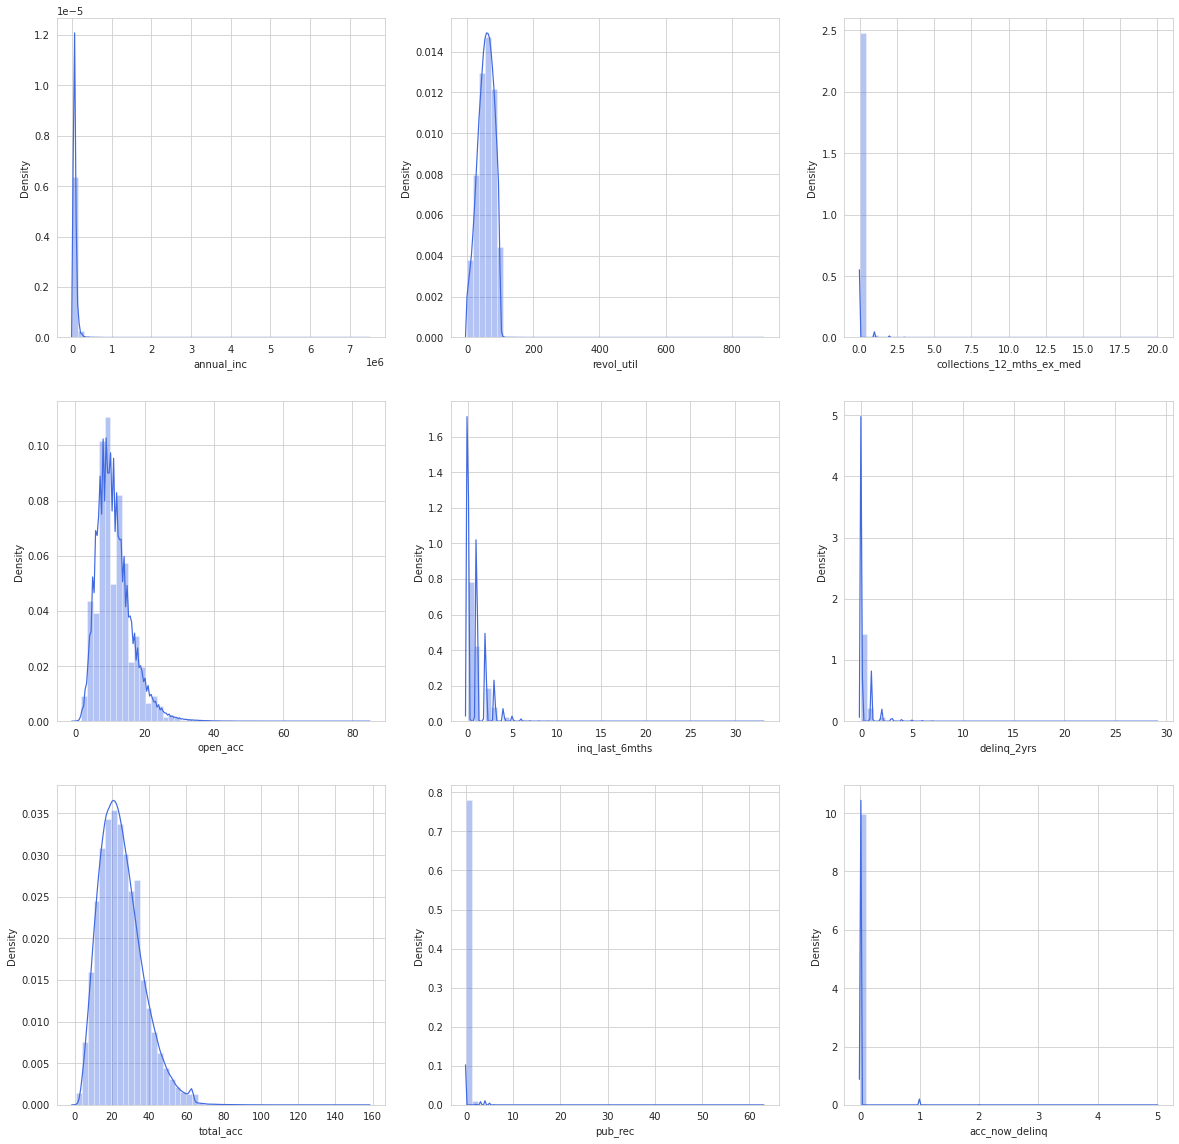

In [ ]:
# distribution of numerical features that have missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(df['annual_inc'], ax=ax[0][0])
sns.distplot(df['revol_util'], ax=ax[0][1])
sns.distplot(df['collections_12_mths_ex_med'], ax=ax[0][2])
sns.distplot(df['open_acc'], ax=ax[1][0])
sns.distplot(df['inq_last_6mths'], ax=ax[1][1])
sns.distplot(df['delinq_2yrs'], ax=ax[1][2])
sns.distplot(df['total_acc'], ax=ax[2][0])
sns.distplot(df['pub_rec'], ax=ax[2][1])
sns.distplot(df['acc_now_delinq'], ax=ax[2][2])

- The distribution of numerical features that mentioned above is skewed, so the missing values in those features will be imputed with their median.

In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

cat_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns.tolist()
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cat_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [ ]:
# after imputation
print('Missing values status:', df.isnull().values.any())

Missing values status: False


## Building a Model

### Drop Unnecessary Feature

Drop the loan status feature because it is not needed in the analysis. For prediction will use the risk feature as the target feature.

In [ ]:
df.drop(['loan_status'], inplace=True, axis=1)

### Create a New Feature from Date Type Features

I will separate these features into days, months and years.
- `issue_d` : The month which the loan was funded.
- `earliest_cr_line` : The month the applicant's earliest reported credit line was opened.
- `last_pymnt_d` : Last month payment was received.
- `next_pymnt_d` : Next scheduled payment date.
- `last_credit_pull_d` : The most recent month LC pulled credit for this loan.

In [ ]:
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["issue_d_day"] = df["issue_d"].dt.day

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month
df["earliest_cr_line_day"] = df["earliest_cr_line"].dt.day

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month
df["last_pymnt_d_day"] = df["last_pymnt_d"].dt.day

df["next_pymnt_d_year"] = df["next_pymnt_d"].dt.year
df["next_pymnt_d_month"] = df["next_pymnt_d"].dt.month
df["next_pymnt_d_day"] = df["next_pymnt_d"].dt.day

df["last_credit_pull_d_year"] = df["last_credit_pull_d"].dt.year
df["last_credit_pull_d_month"] = df["last_credit_pull_d"].dt.month
df["last_credit_pull_d_day"] = df["last_credit_pull_d"].dt.day

In [ ]:
# drop the original
df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True, axis=1)

In [ ]:
df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day
6992,7200,7200,7200.0,36 months,6.03,219.14,A,A1,7 years,RENT,...,1,2014,2,1,2016,2,1,2014,2,1
108222,12000,12000,11950.0,36 months,9.71,385.58,B,B1,10+ years,MORTGAGE,...,1,2015,8,1,2016,2,1,2016,1,1
385806,27000,27000,27000.0,60 months,14.99,642.19,C,C5,< 1 year,RENT,...,1,2016,1,1,2016,2,1,2016,1,1
23002,6000,6000,6000.0,36 months,13.72,204.26,C,C5,3 years,RENT,...,1,2013,5,1,2016,2,1,2016,1,1
378419,17500,17500,17500.0,60 months,18.24,446.68,D,D5,5 years,MORTGAGE,...,1,2016,1,1,2016,2,1,2016,1,1


### Encoding

There are 2 options in converting categorical features to numeric, namely label encoding and one hot encoding.
1. Apply **One Hot Encoding** when:
    - The categorical feature is not ordinal.
    - The number of categorical features is less so one-hot encoding can be effectively applied.


2. Apply **Label Encoding** when:
    - The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
    - The number of categories is quite large as one-hot encoding can lead to high memory consumption.

In [ ]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'risk']

#### One Hot Encoding

`home_ownership`, `verification_status`, `pymnt_plan`, `purpose`, `initial_list_status` will be encoded using one hot encoding because these features is non-ordinal data.

In [ ]:
df_1 = df.drop(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'], axis=1)
cat_1 = df[['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']]

In [ ]:
oho = OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame(oho.fit_transform(cat_1))
df_encoded.columns = oho.get_feature_names(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
290624,25000,25000,25000.0,36 months,12.99,842.23,C,C1,10+ years,126000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
367790,25000,25000,25000.0,60 months,18.99,648.38,E,E1,2 years,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
453826,8875,8875,8875.0,36 months,13.98,303.25,C,C1,1 year,22000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47603,5500,5500,5500.0,36 months,14.47,189.24,C,C2,9 years,44000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
341452,7200,7200,7200.0,36 months,12.49,240.84,B,B5,3 years,37000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Manual Encoding

`emp_length` feature will be encoded manually because its meaning will change if done with label encoding.

In [ ]:
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8, 
                                           '9 years':9, '10+ years':10},inplace=True)

#### Label Encoding

`term`, `grade`, `sub_grade`, `risk`, `initial_list_status` will be encoded using one hot encoding because these feature is ordinal data.

In [ ]:
# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
    # perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])

In [ ]:
concatenated_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
0,171,171,4975.0,0,10.65,162.87,1,6,10,24000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,71,71,2500.0,1,15.27,59.83,2,13,0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,67,67,2400.0,0,15.96,84.33,2,14,10,12252.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,371,371,10000.0,0,13.49,339.31,2,10,10,49200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,91,91,3000.0,1,12.69,67.79,1,9,1,80000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Selection

In [ ]:
corr = concatenated_data.corrwith(concatenated_data["risk"])
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
30,risk,1.000000
22,total_rec_prncp,0.254255
37,last_pymnt_d_year,0.252786
21,total_pymnt_inv,0.194638
20,total_pymnt,0.193977
...,...,...
33,issue_d_day,NaN
36,earliest_cr_line_day,NaN
39,last_pymnt_d_day,NaN
42,next_pymnt_d_day,NaN


- The features that have high correlation value with risk status (target feature) is `recoveries`. 
- `collection_recovery_fee`, `total_rec_prncp` , `last_pymnt_d_year`, `total_pymnt_inv`, `total_pymnt`, `last_pymnt_amnt`, `out_prncp`, `out_prncp_inv`, `total_rec_late_fee`, `grade`, `sub_grade`, `int_rate`, `last_credit_pull_d_year` , `last_credit_pull_d_month`, and `last_pymnt_d_month` have low correlation value but the correlation value is still greater than the other features (corr > 0.10).

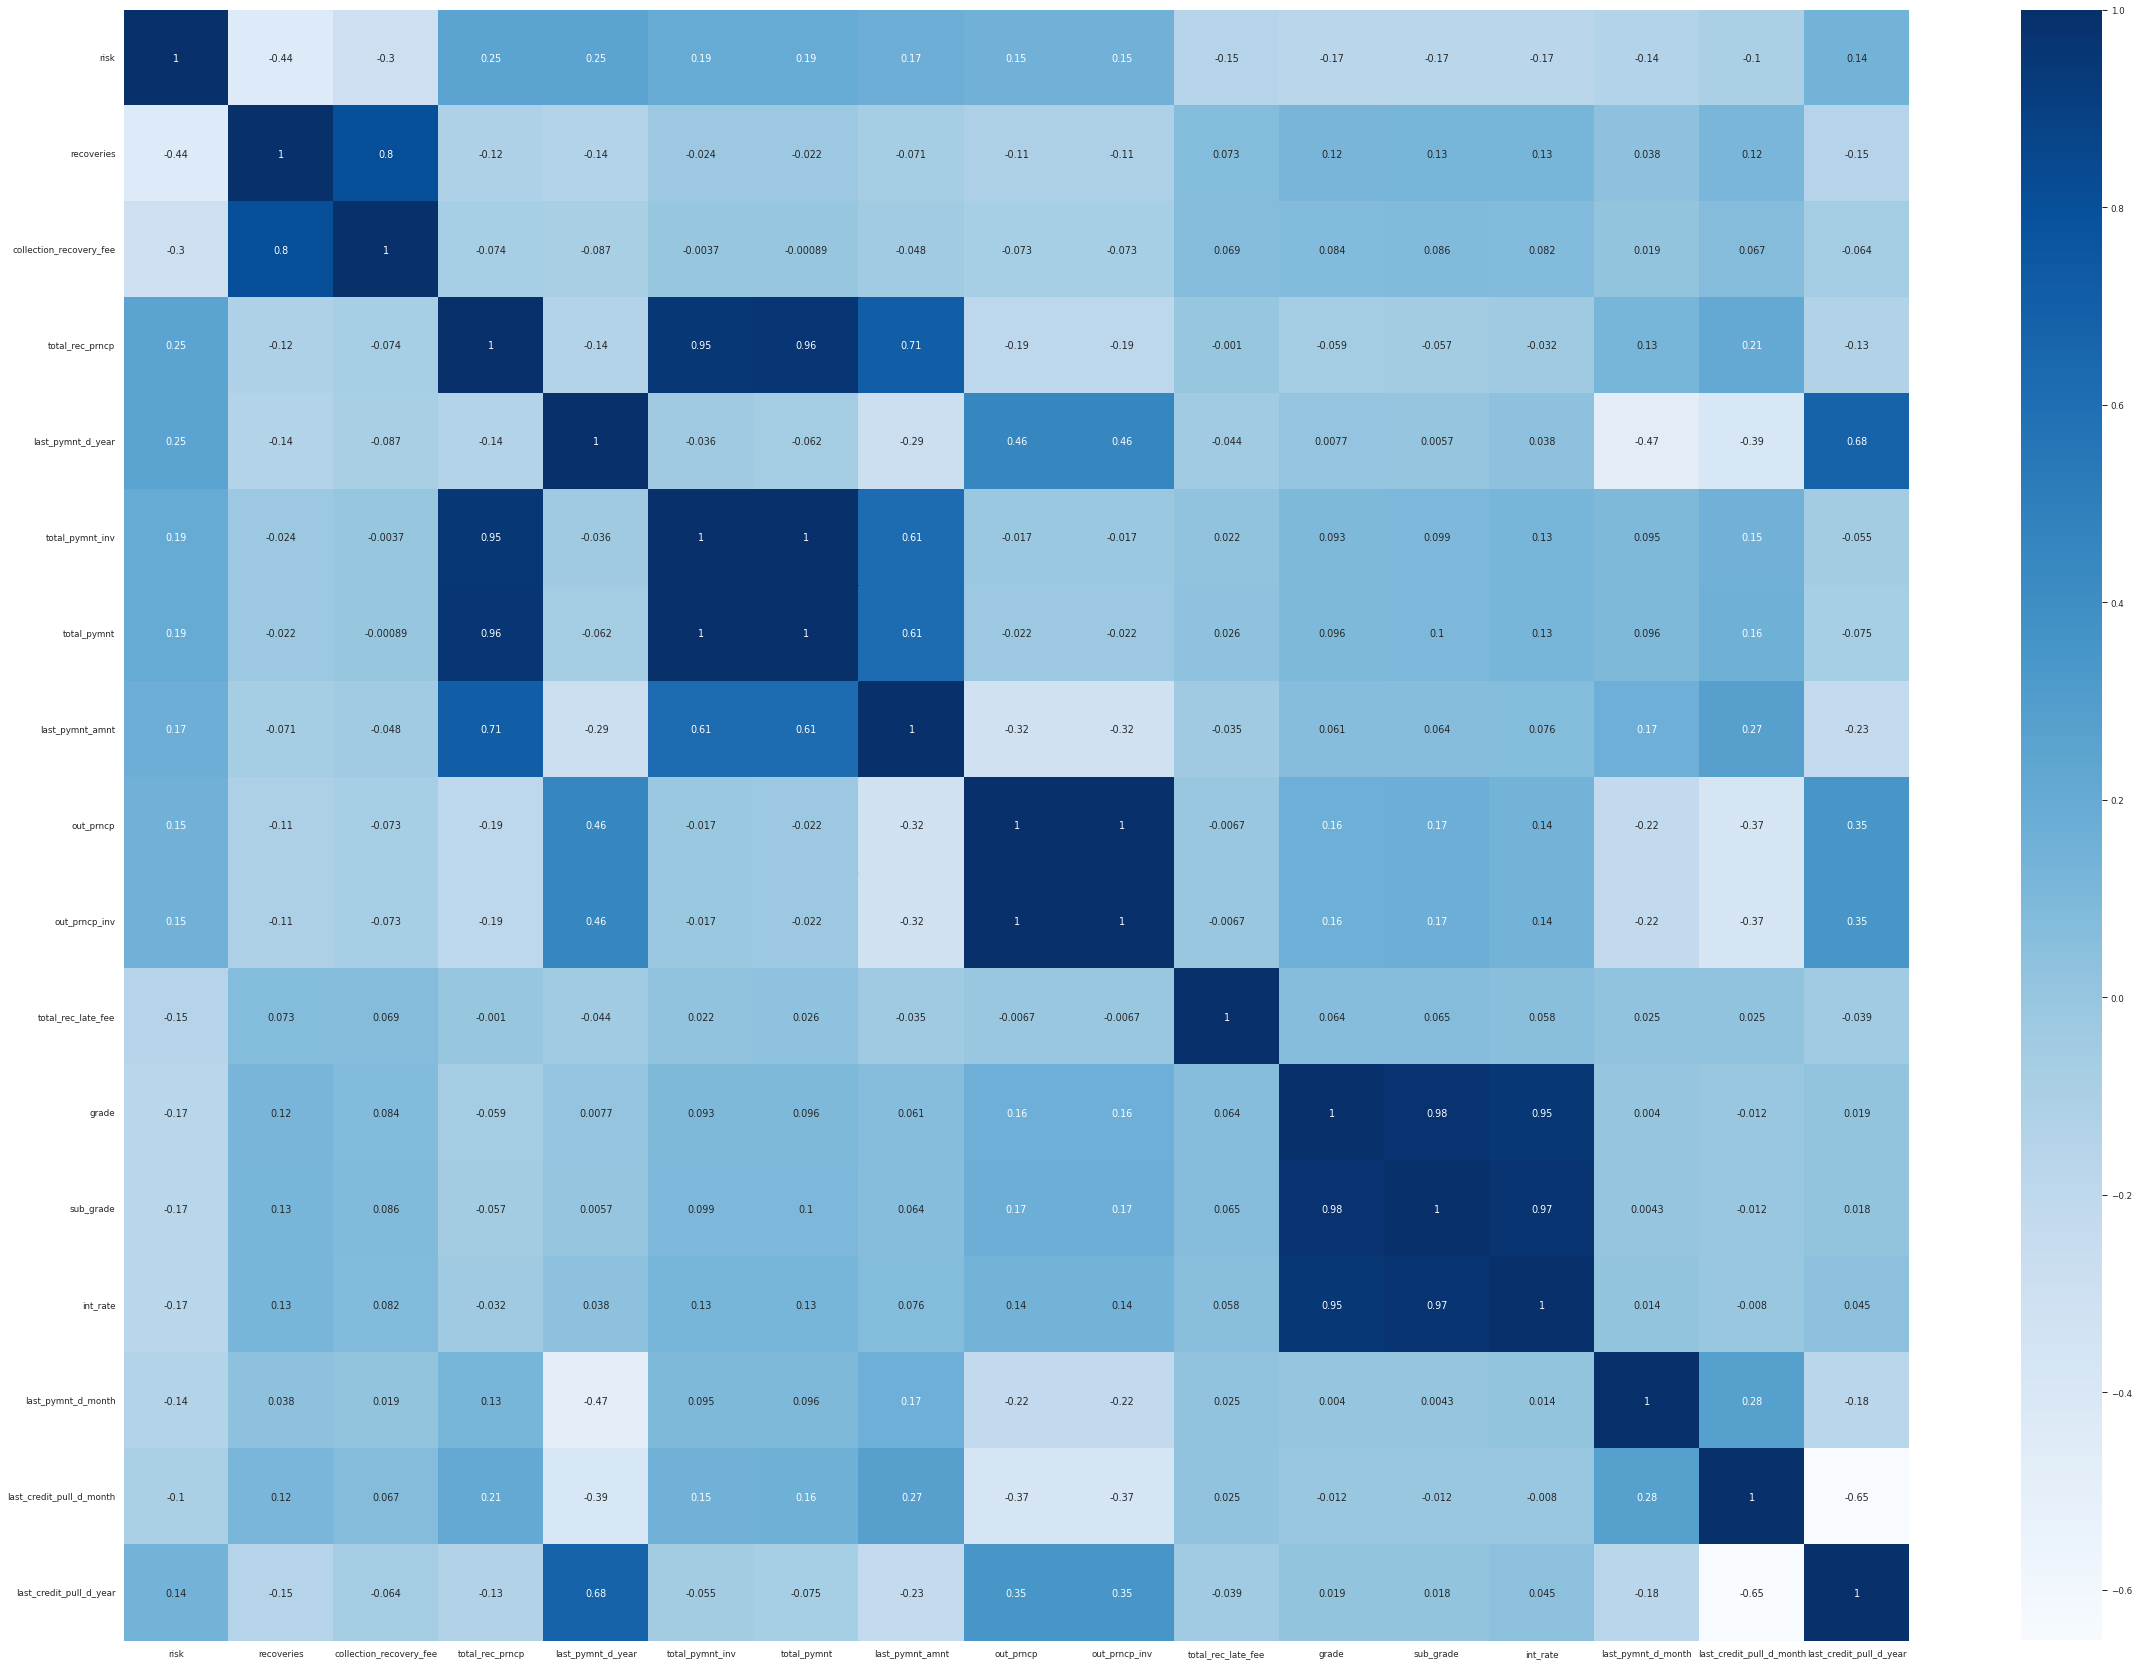

In [ ]:
# let's only include the features mentioned above
fig = plt.figure(figsize = (40,30))
corr_data = concatenated_data[['risk', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp' , 'last_pymnt_d_year', 
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                              'last_credit_pull_d_month', 'last_credit_pull_d_year']]
sns.heatmap(corr_data.corr(),cmap='Blues', annot = True);

### Handling Imbalanced Data

In [ ]:
# define X and y
X = corr_data.drop(['risk'], axis=1) #features
y = corr_data['risk'] #target

The risk status is highly imbalanced, with 11% Bad Risk and 88% Good Risk. So for modelling, it will be used **class_weight = 'balanced'** for handling imbalanced target.

**Note**: When apply machine learning algorithms with imbalanced data, the model obtained will be more biased towards the majority classes. It means the model will predict the majority classes instead of the minority classes.

### Data Splitting

Split the data into training set and testing set with proportion of 80:20.

In [ ]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(373028, 16) (93257, 16)


### Normalization

Normalization is important because the features have different range of value. 

**Note**: Features that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

In [ ]:
# normalize the data for numerical stability
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Machine Learning Techniques

Here are some algorithms that will be tested to determine the best model to predict credit risk:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Extra Trees Classifier
5. LightGBM Classifier

#### 1. Decision Tree

In [ ]:
# train the model
dt_model = DecisionTreeClassifier(class_weight='balanced').fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier(class_weight='balanced')


##### Performance of Training Model

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     41759
           1       1.00      1.00      1.00    331269

    accuracy                           1.00    373028
   macro avg       1.00      1.00      1.00    373028
weighted avg       1.00      1.00      1.00    373028



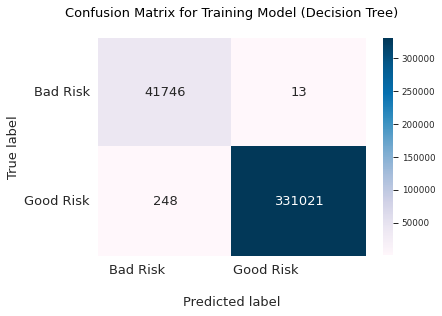

In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of decision tree algorithms has a very high accuracy value.


Based on **confusion matrix**, it observed that:
- The classifier made a total of 373,028 predictions. But only 372,767 of them were predicted correctly.
- The classifier predicted bad risk 331,021 and good risk 41,746. In reality, risk status in the sample has 41,759 bad risk and 331,269 good risk.
- The decision tree model classified almost 100% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     10427
           1       0.99      0.99      0.99     82830

    accuracy                           0.98     93257
   macro avg       0.94      0.96      0.95     93257
weighted avg       0.98      0.98      0.98     93257



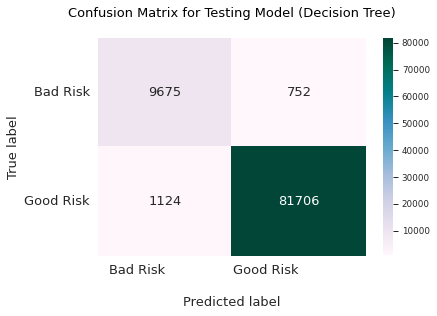

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of decision tree algorithms has a very high accuracy value.


Based on **confusion matrix**, it observed that:
- The classifier made a total of 93,257 predictions. But only 91,381 of them were predicted correctly.
- The classifier predicted bad risk 9,675 and good risk 81,706. In reality, risk status in the sample has 10,427 bad risk and 82,830 good risk.
- The model classified 97% of them correctly.

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.93 %
Testing Accuracy: 97.99 %


#### 2. Random Forest

In [ ]:
# train the model
rf_model = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
print(rf_model)

RandomForestClassifier(class_weight='balanced')


##### Performance of Training Model

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41759
           1       1.00      1.00      1.00    331269

    accuracy                           1.00    373028
   macro avg       1.00      1.00      1.00    373028
weighted avg       1.00      1.00      1.00    373028



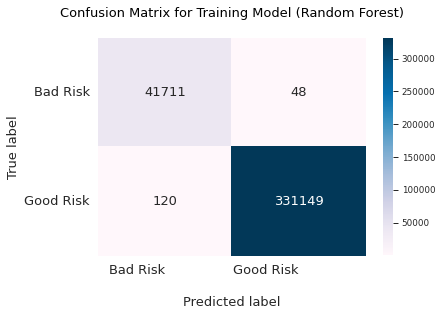

In [ ]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of random forest algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 373,028 predictions. But only 372,860 of them were predicted correctly.
- The classifier predicted bad risk 41,711 and good risk 331,149. In reality, risk status in the sample has 41,759 bad risk and 331,269 good risk.
- The random forest model classified almost 100% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10427
           1       0.99      1.00      0.99     82830

    accuracy                           0.99     93257
   macro avg       0.99      0.96      0.97     93257
weighted avg       0.99      0.99      0.99     93257



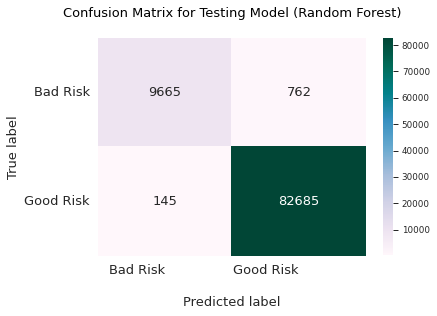

In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of random forest algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 93,257 predictions. But only 92,350 of them were predicted correctly.
- The classifier predicted bad risk 9,665 and good risk 82,685. In reality, risk status in the sample has 10,427 bad risk and 82,830 good risk.
- The random forest model classified 99% of them correctly.

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.95 %
Test Accuracy: 99.03 %


#### 3. Logistic Regression

In [ ]:
# train the model
log_model = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print(log_model)

LogisticRegression(class_weight='balanced')


##### Performance of Training Model

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.46      0.88      0.61     41759
           1       0.98      0.87      0.92    331269

    accuracy                           0.87    373028
   macro avg       0.72      0.88      0.77    373028
weighted avg       0.93      0.87      0.89    373028



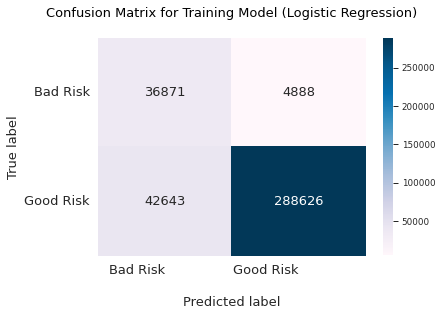

In [ ]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of logistic regression algorithms has a high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 373,028 predictions. But only 325,497 of them were predicted correctly.
- The classifier predicted bad risk 36,871 and good risk 288,626. In reality, risk status in the sample has 41,759 bad risk and 331,269 good risk.
- The model classified 87% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.42      0.91      0.58     10427
           1       0.99      0.84      0.91     82830

    accuracy                           0.85     93257
   macro avg       0.71      0.88      0.74     93257
weighted avg       0.92      0.85      0.87     93257



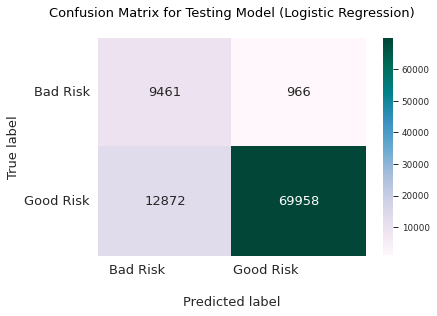

In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of logistic regression algorithms has a high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 93,257 predictions. But only 79,419 of them were predicted correctly.
- The classifier predicted bad risk 9,461 and good risk 69,958. In reality, risk status in the sample has 10,427 bad risk and 82,830 good risk.
- The logistic regression model classified 85% of them correctly.

In [ ]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 87.26 %
Test Accuracy: 85.16 %


#### 4. Extra Trees Classifier

In [ ]:
# train the model
etc_model = ExtraTreesClassifier(class_weight='balanced').fit(X_train, y_train)
print(etc_model)

ExtraTreesClassifier(class_weight='balanced')


##### Performance of Training Model

Classification Report Training Model (Extra Trees Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     41759
           1       1.00      1.00      1.00    331269

    accuracy                           1.00    373028
   macro avg       1.00      1.00      1.00    373028
weighted avg       1.00      1.00      1.00    373028



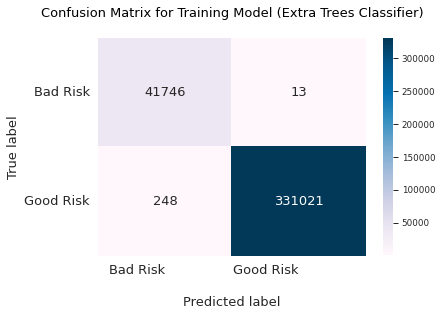

In [ ]:
# predict data train
y_train_pred_etc = etc_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Extra Trees Classifier):')
print(classification_report(y_train, y_train_pred_etc))

# form confusion matrix as a dataFrame
confusion_matrix_etc = pd.DataFrame((confusion_matrix(y_train, y_train_pred_etc)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_etc, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Extra Trees Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of extra trees classifier algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 373,028 predictions. But only 372,767 of them were predicted correctly.
- The classifier predicted bad risk 41,746 and good risk 331,021. In reality, risk status in the sample has 41,759 bad risk and 331,269 good risk.
- The extra trees classifier model classified almost 100% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (Extra Trees Classifier):
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10427
           1       0.99      1.00      0.99     82830

    accuracy                           0.99     93257
   macro avg       0.98      0.96      0.97     93257
weighted avg       0.99      0.99      0.99     93257



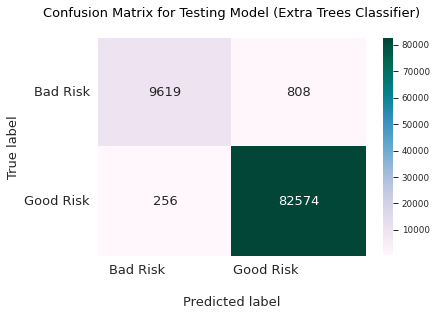

In [ ]:
# predict data test
y_test_pred_etc = etc_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Extra Trees Classifier):')
print(classification_report(y_test, y_test_pred_etc))

# form confusion matrix as a dataFrame
confusion_matrix_etc = pd.DataFrame((confusion_matrix(y_test, y_test_pred_etc)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_etc, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Extra Trees Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of extra trees classifier algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 93,257 predictions. But only 92,166 of them were predicted correctly.
- The classifier predicted bad risk 9,619 and good risk 82,547. In reality, risk status in the sample has 10,427 bad risk and 82,830 good risk.
- The extra trees classifier model classified almost 98% of them correctly.

In [ ]:
acc_etc_train=round(etc_model.score(X_train,y_train)*100,2)
acc_etc_test=round(etc_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_etc_train))
print("Test Accuracy: {} %".format(acc_etc_test))

Training Accuracy: 99.93 %
Test Accuracy: 98.86 %


#### 5. LightGBM Classifier

In [ ]:
# train the model
lgbm_model = lgb.LGBMClassifier(class_weight='balanced').fit(X_train, y_train)

##### Performance of Training Model

Classification Report Training Model (LightGBM Classifier):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     41759
           1       0.99      0.99      0.99    331269

    accuracy                           0.98    373028
   macro avg       0.95      0.97      0.96    373028
weighted avg       0.99      0.98      0.99    373028



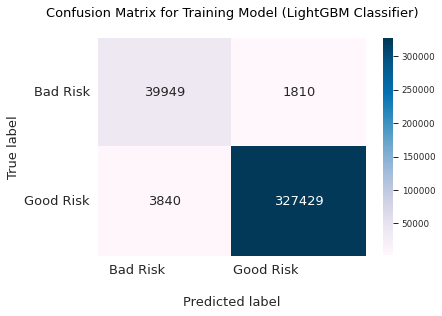

In [ ]:
# predict data train
y_train_pred_lgbm = lgbm_model.predict(X_train)

# print classification report
print('Classification Report Training Model (LightGBM Classifier):')
print(classification_report(y_train, y_train_pred_lgbm))

# form confusion matrix as a dataFrame
confusion_matrix_lgbm = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lgbm)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_lgbm, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (LightGBM Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the training model of lightgbm classifier algorithms has a very high accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 373,028 predictions. But only 367,378 of them were predicted correctly.
- The classifier predicted bad risk 39,949 and good risk 327,429. In reality, risk status in the sample has 41,759 bad risk and 331,269 good risk.
- The lightgbm classifier model classified 98% of them correctly.

##### Performance of Testing Model

Classification Report Testing Model (LightGBM Classifier):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10427
           1       0.99      0.99      0.99     82830

    accuracy                           0.98     93257
   macro avg       0.94      0.97      0.96     93257
weighted avg       0.98      0.98      0.98     93257



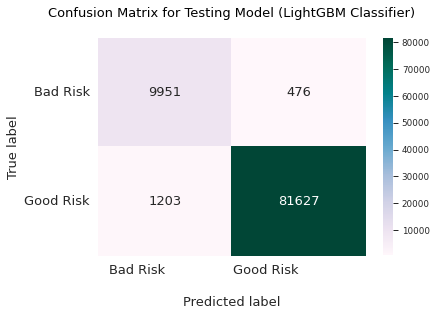

In [ ]:
# predict data test
y_test_pred_lgbm = lgbm_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (LightGBM Classifier):')
print(classification_report(y_test, y_test_pred_lgbm))

# form confusion matrix as a dataFrame
confusion_matrix_lgbm = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lgbm)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_lgbm, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (LightGBM Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Based on the **classification report** results, the testing model of gradient boosting algorithms has a medium accuracy value.

Based on **confusion matrix**, it observed that:
- The classifier made a total of 93,257 predictions. But only 91,578 of them were predicted correctly.
- The classifier predicted bad risk 9,951 and good risk 81,627 times. In reality, risk status in the sample has 10,427 bad risk and 82,830 good risk.
- The bad risk class and the good risk class are both the best-classified classes. However, the bad risk class is slightly better than the good risk class, the gradient boosting model classified 98% of them correctly.

In [ ]:
acc_lgbm_train=round(lgbm_model.score(X_train,y_train)*100,2)
acc_lgbm_test=round(lgbm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_lgbm_train))
print("Test Accuracy: {} %".format(acc_lgbm_test))

Training Accuracy: 98.49 %
Test Accuracy: 98.2 %


### Model Evaluation

The results will be evaluated and compared by looking at ROC-AUC value of each model. ROC-AUC or "Area Under the Curve (AUC) of "Receiver Characteristic Operator” (ROC) is an evaluation metric for binary classification problems. It is a probability curve that plots the True Positive Rate (TPR) against False Positive Rate (FPR) at various threshold values and essentially separates the 'signal' from the 'noise'. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

#### ROC Curves

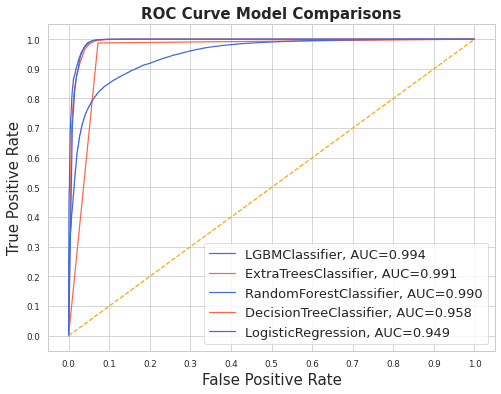

In [ ]:
# Instantiate the classfiers and make a list
model = [lgbm_model, etc_model, rf_model, dt_model, log_model]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in model:
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Model Comparisons', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Based on the ROC Curve Model, LightGBM Classifier has the highest AUC score with **0.994**.

#### KS Statistic Plot

<Figure size 1080x720 with 0 Axes>

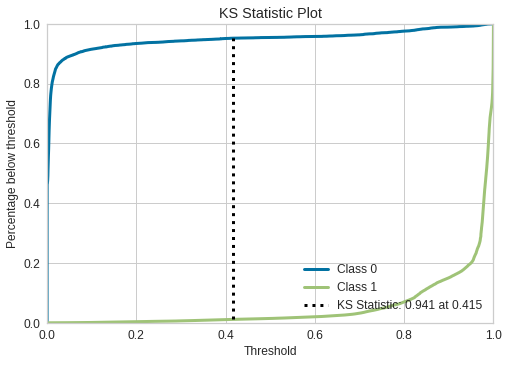

In [ ]:
import scikitplot as skplt
plt.figure(figsize=(15,10))
y_probas = lgbm_model.fit(X_train, y_train).predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show();

Kolmogorov-Smirnov chart measures performance of classification models. K-S is a measure of the degree of separation between the positive and negative distributions. K-S should be a high value (Max=1.0) when the fit is good and a low value (Min = 0.0) when the fit is not good. When the K-S value goes above 0.05, it means the fit is significant. Based on the graph above, KS value is **0.941**, and it's considered LightGBM Classifier as good performance model.

#### Feature Importances

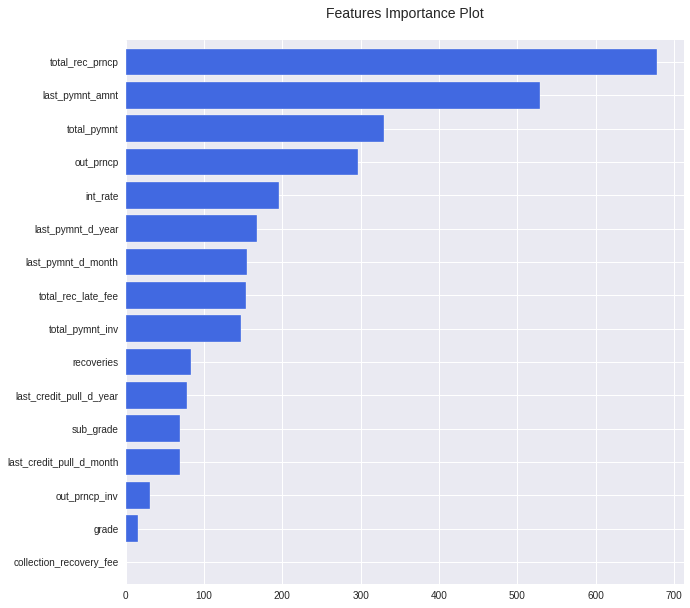

In [ ]:
importances_model = pd.Series(lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_model.plot(kind ='barh', color='royalblue', width=0.8)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()

## Conclusion

1. It concluded that the **LightGBM Classifier** as the best model to predict the loan risk status of the applicants. Compared to the all the models, which have not significant differences in accuracy scores for training and testing data. The difference is LightGBM Classifier has the highest ROC-AUC score compares to the other models.
    
2. The top 3 important features in determining whether an applicant is likely to not repay their loan are the **total principal received**, the **last payment amount**, and the **total payment**. The company needs to monitor these indicators to reduce the risk of loss. In the future, If there are applicants with those indicators, then the company can take action such as rejecting their loan, reducing the amount of the loan, or lending at a higher interest rate to avoid and reduce the total loss suffered by the company.